In [891]:
import numpy as np
import matplotlib.pyplot as plt

In [892]:
#2
f = lambda x:2*x #derivative of function we are searching for 

sig = lambda x:1/(1 + np.exp(-x)) #activation function 
dsig = lambda x:(np.exp(-x))/(1+np.exp(-x))**2 #activation function derivative 

def ReLU(x): #second possible activation function 
    return x * (x > 0)

def dReLU(x):#second possible activation function derivative 
    return 1. * (x > 0)

<h><b>The neural network is the similar to the following (one layer perceptron):</b></h>
<div>
    <img src = "https://miro.medium.com/max/3446/1*-IPQlOd46dlsutIbUq1Zcw.png" width = 25%>
</div>

In [893]:
#3
def N(w0,w1,b0,b1,t): #neural network
    return np.dot(ReLU(np.dot(w0,t)+b0),w1) + b1

In [894]:
#4
def dN(w0,w1,b0,b1,t): #neural network derivative
    alpha = 1e-3 #term that helps find delta w where delta w = alpha*w
    return (N(w0,w1,b0,b1,t+alpha*t)-N(w0,w1,b0,b1,t-alpha*t))/(2*alpha)
    #return np.dot(np.dot(dsig(np.dot(w0,t) + b0).T,w0),w1)

In [895]:
#5
def L(w0,w1,b0,b1,t): #cost function
    err_sum = 0 #sum of cost for each input
    for t_i in t:
        err_sum += (dN(w0,w1,b0,b1,t_i)*t_i + N(w0,w1,b0,b1,t_i) - f(t_i))**2
    return np.mean(np.sqrt(err_sum))

In [896]:
#6
def grad(w0,w1,b0,b1,t): #gradient of the cost function 
    alpha = 1e-3 #term that helps find delta x where delta x  = alpha*x
    
    #find derivative of cost function with respect to each variable 
    dLdw0 = (L(w0+alpha*w0,w1,b0,b1,t) - L(w0-alpha*w0,w1,b0,b1,t))/(2*alpha*w0) 
    dLdw1 = (L(w0,w1+alpha*w1,b0,b1,t) - L(w0,w1-alpha*w1,b0,b1,t))/(2*alpha*w1)
    dLdb0 = (L(w0,w1,b0+alpha*b0,b1,t) - L(w0,w1,b0-alpha*b0,b1,t))/(2*alpha*b0)
    dLdb1 = (L(w0,w1,b0,b1+alpha*b1,t) - L(w0,w1,b0,b1-alpha*b1,t))/(2*alpha*b1)
    
    return dLdw0,dLdw1,dLdb0,dLdb1

In [897]:
#7
def gradient_descent(w0,w1,b0,b1,t,learning_rate,n_iter): #gradient descent algorithm
    s0 = w0
    s1 = w1
    s2 = b0
    s3 = b1
    for _ in range(n_iter):
        diff = np.multiply(grad(s0,s1,s2,s3,t),-learning_rate) #find out how much we need to change each variable
        s0 = np.add(s0,diff[0]) #change w0
        s1 = np.add(s1,diff[1]) #change w1
        s2 = np.add(s2,diff[2]) #change b0
        s3 = np.add(s3,diff[3]) #change b1
        print("Loss: " + str(L(s0,s1,s2,s3,t))) #calculate the new value of the loss
    return s0,s1,s2,s3

In [898]:
#number of nodes in each layer 
n_input = 1
n_hidden = 2
n_output = 1

#values for training
learning_rate = 0.001
n_iter = 5000
t = np.linspace(0,1,10)

#1 - create the weight and bias vectors
w0 = np.random.randn(n_input,n_hidden)
w1 = np.random.randn(n_hidden,n_output)
b0 = np.random.randn(n_hidden)
b1 = np.random.randn(n_output)

In [899]:
values = gradient_descent(w0,w1,b0,b1,t,learning_rate,n_iter)
w0 = values[0]
w1 = values[1]
b0 = values[2]
b1 = values[3]

Loss: 6.091756944417373
Loss: 6.021656147727273
Loss: 5.951783912198349
Loss: 5.882136105215562
Loss: 5.812708583686164
Loss: 5.743497187679203
Loss: 5.674497733061427
Loss: 5.605706002961563
Loss: 5.537117737857074
Loss: 5.468728624040342
Loss: 5.400534280177138
Loss: 5.332530241604768
Loss: 5.264711941944898
Loss: 5.1970746915224
Loss: 5.129613651962539
Loss: 5.062323806200461
Loss: 4.995199922958484
Loss: 4.928236514522293
Loss: 4.8614277863523485
Loss: 4.794767576703352
Loss: 4.728249283929426
Loss: 4.661865778518761
Loss: 4.595609296063632
Loss: 4.529471306238153
Loss: 4.463442351321323
Loss: 4.397511845722728
Loss: 4.331667825049317
Loss: 4.2658966291601095
Loss: 4.200182497804703
Loss: 4.134507048893912
Loss: 4.06884859680651
Loss: 4.003181248928473
Loss: 3.9374736888108353
Loss: 3.8716875067825876
Loss: 3.805774860648465
Loss: 3.739675115928464
Loss: 3.6733098789958056
Loss: 3.6065753976636503


Loss: 3.5393304412342297
Loss: 3.4713759579606833
Loss: 3.402418659762794
Loss: 3.3320001345515
Loss: 3.259342203625927
Loss: 3.1829491199873705
Loss: 3.0992749473160948
Loss: 2.9952109768237327
Loss: 1.8507419465203665
Loss: 1.8146303956915257
Loss: 1.779373142914365
Loss: 1.7450064940967076
Loss: 1.7115644327160522
Loss: 1.6790783497787716
Loss: 1.6475767508186145
Loss: 1.6170849499790712
Loss: 1.5876247622410837
Loss: 1.5592142055853364
Loss: 1.5318672254147914
Loss: 1.5055934536116178
Loss: 1.4803980141925812
Loss: 1.456281386448971
Loss: 1.4332393348137755
Loss: 1.4112629124156428
Loss: 1.390338542519397
Loss: 1.370448178901717
Loss: 1.3515695429172792
Loss: 1.3336764317421892
Loss: 1.3167390893157334
Loss: 1.3007246289994894
Loss: 1.2855974951304905
Loss: 1.271319949555649
Loss: 1.2578525689406184
Loss: 1.2451547391053677
Loss: 1.2331851337811623
Loss: 1.2219021668386418
Loss: 1.211264409077804


Loss: 1.2012309628895546
Loss: 1.1917617903559385
Loss: 1.1828179925080888
Loss: 1.1743620393814964
Loss: 1.166357952162668
Loss: 1.1587714400192928
Loss: 1.1515699951971974
Loss: 1.1447229506070098
Loss: 1.1382015044996265
Loss: 1.131978716949262
Loss: 1.1285564766218272
Loss: 1.1295333247713268
Loss: 1.1243897599630375
Loss: 1.1194245120691677
Loss: 1.114621926929289
Loss: 1.1099676433207335
Loss: 1.1054485077435392
Loss: 1.1017322182786613
Loss: 1.1043799581545601
Loss: 1.1003861178832206
Loss: 1.0964681927927786
Loss: 1.0926194754778749
Loss: 1.0888338605557202
Loss: 1.086539123315003
Loss: 1.090357188269656
Loss: 1.0868922104828396
Loss: 1.0834571872763146
Loss: 1.0800495906212548
Loss: 1.076667117540385
Loss: 1.075518033452988
Loss: 1.0761214763088425
Loss: 1.0830575749614229
Loss: 1.079965034381592
Loss: 1.0768737227306135
Loss: 1.0737835244327507
Loss: 1.0706943365888895
Loss: 1.0676060681567028
Loss: 1.064518639192944


Loss: 1.0614319801518195
Loss: 1.0645276469428222
Loss: 1.073068540785113
Loss: 1.0701460684845698
Loss: 1.0672154602504818
Loss: 1.0642770711507799
Loss: 1.061331258109725
Loss: 1.0583783774740454
Loss: 1.0554187830111026
Loss: 1.0524528242790492
Loss: 1.0494808453183695
Loss: 1.0482974107418426
Loss: 1.0545268252090105
Loss: 1.051623366460201
Loss: 1.0487115455351372
Loss: 1.0457916817379556
Loss: 1.0428641101156875
Loss: 1.0399291766929555
Loss: 1.0402873429920152
Loss: 1.037363262806418
Loss: 1.0396217793925269
Loss: 1.0367195832785845
Loss: 1.0338094488756273
Loss: 1.036598714758842
Loss: 1.033711012242905
Loss: 1.0308151796391807
Loss: 1.0304814896727936
Loss: 1.0367023590814919
Loss: 1.033851170459778
Loss: 1.0309916957983736
Loss: 1.0281239726263234
Loss: 1.0252481143516408
Loss: 1.0230616328956015
Loss: 1.028418105325792
Loss: 1.025568595593693
Loss: 1.02271107765451


Loss: 1.0198455999997789
Loss: 1.0173286730390392
Loss: 1.0223296365112362
Loss: 1.0194852322251595
Loss: 1.0166330602888431
Loss: 1.0137731491915218
Loss: 1.0164477588597476
Loss: 1.0251994210483881
Loss: 1.0223929609338835
Loss: 1.0195801120242713
Loss: 1.0167603677208432
Loss: 1.0139333934988348
Loss: 1.0110989987135475
Loss: 1.0082571123743347
Loss: 1.0054077623671673
Loss: 1.002551057671369
Loss: 1.0049567918761975
Loss: 1.002114350910448
Loss: 0.9992646685307287
Loss: 1.002468176450821
Loss: 0.9996355967040209
Loss: 0.9967959002200223
Loss: 1.0014774513570872
Loss: 1.0053964340115635
Loss: 1.002597248498295
Loss: 0.9997918521486464
Loss: 0.9969798830150226
Loss: 0.9941611314574453
Loss: 0.9913355141681742
Loss: 0.988503051954276
Loss: 0.9900244998612174
Loss: 0.9976047895664687
Loss: 0.9948155657752443
Loss: 0.9920204979427389


Loss: 0.9892191948949576
Loss: 0.9864114248620335
Loss: 0.9835970881749053
Loss: 0.9807761939394002
Loss: 0.9836058845355631
Loss: 0.9904284699799928
Loss: 0.9876509421672357
Loss: 0.9848680120992789
Loss: 0.9820792317962466
Loss: 0.9792843245872905
Loss: 0.9764831557517865
Loss: 0.973675707462533
Loss: 0.9708620574448563
Loss: 0.9744128852450602
Loss: 0.9716178578139499
Loss: 0.9688167626430724
Loss: 0.9710709415782454
Loss: 0.9784313217782177
Loss: 0.9756704687832425
Loss: 0.9729048825117068
Loss: 0.9701340499381224
Loss: 0.9673576439978736
Loss: 0.9645754915504255
Loss: 0.961787546086089
Loss: 0.9591266617210653
Loss: 0.9628053177765764
Loss: 0.9600306326230742
Loss: 0.9572503749945434
Loss: 0.957933259184172
Loss: 0.9648459478862825
Loss: 0.9620985311363393
Loss: 0.9593465712900325
Loss: 0.9565896532354183
Loss: 0.9538275343577141
Loss: 0.9510601139915038
Loss: 0.9485814009663491
Loss: 0.952212063249591
Loss: 0.9494576720107759
Loss: 0.9466982010256236
Loss: 0.9468909142788362
Loss


Loss: 0.950456554048066
Loss: 0.9477208414177831
Loss: 0.9449805712593542
Loss: 0.9422355288857215
Loss: 0.9394856392307603
Loss: 0.9416962410121896
Loss: 0.9481888131140617
Loss: 0.9454725377244186
Loss: 0.9427527332322778
Loss: 0.9400288784901125
Loss: 0.9373006490024353
Loss: 0.9345678818762059
Loss: 0.9318305461426378
Loss: 0.9310301666819226
Loss: 0.9312623995916537
Loss: 0.9365921138046168
Loss: 0.9338850317994445
Loss: 0.9311741601106192
Loss: 0.9284592158332392
Loss: 0.9257400722081282
Loss: 0.9284384907444149
Loss: 0.9324959646774671
Loss: 0.9298035395005835
Loss: 0.927107870170448
Loss: 0.9244085479700183
Loss: 0.9217053451727947
Loss: 0.918998181708318
Loss: 0.9177928427748298
Loss: 0.9185726584340445
Loss: 0.9158739341028022
Loss: 0.9171614486207667
Loss: 0.9144701625558435
Loss: 0.9143850135695123


Loss: 0.9190154534474819
Loss: 0.9163442529997096
Loss: 0.9136701362226851
Loss: 0.910992785646881
Loss: 0.9092840746032747
Loss: 0.9128702630725345
Loss: 0.9102056801926254
Loss: 0.9075380969171738
Loss: 0.9053768371270133
Loss: 0.9083042433143453
Loss: 0.905646482106161
Loss: 0.9029857971385163
Loss: 0.9043715048137092
Loss: 0.910253469879168
Loss: 0.9076151094989018
Loss: 0.9049752030984531
Loss: 0.9023331235557064
Loss: 0.899688472713332
Loss: 0.8970410391245415
Loss: 0.8992666255868634
Loss: 0.9027433488456951
Loss: 0.9001168778706962
Loss: 0.8974884927370019
Loss: 0.8948577817954871
Loss: 0.892224524411876
Loss: 0.8932502208311023
Loss: 0.8982299126652751
Loss: 0.8956178160452266
Loss: 0.8930041717109437
Loss: 0.8903885151722923
Loss: 0.8877705847556127
Loss: 0.8857780637278597
Loss: 0.8883780916312116


Loss: 0.8857710670393638
Loss: 0.8831619102462108
Loss: 0.8821548822106555
Loss: 0.8820345630581907
Loss: 0.8828597151290181
Loss: 0.8875259502249536
Loss: 0.8849432913227121
Loss: 0.8823597526873598
Loss: 0.8797748187773416
Loss: 0.8771881903368873
Loss: 0.8775474547758685
Loss: 0.8826200702743233
Loss: 0.880051544407973
Loss: 0.8774822771804565
Loss: 0.874911781657872
Loss: 0.8723397835394986
Loss: 0.8725072148851547
Loss: 0.8775186021507803
Loss: 0.8749645953820554
Loss: 0.8724099755240035
Loss: 0.8698542932030005
Loss: 0.8672973061918937
Loss: 0.8686157033641613
Loss: 0.8713283724593207
Loss: 0.8687879398982666
Loss: 0.8662467754307422
Loss: 0.8637045786405123
Loss: 0.8628740766905625
Loss: 0.8665622968808373
Loss: 0.8640347208573875
Loss: 0.861506526586243
Loss: 0.8589774629164606
Loss: 0.8583471249105755
Loss: 0.8609172183031554
Loss: 0.8584020124470197
Loss: 0.8558862213769632
Loss: 0.8558260413414082
Loss: 0.8595997233007754
Loss: 0.8570988863789802
Loss: 0.8545980428295267
Los


Loss: 0.8525668712395794
Loss: 0.8562436574628256
Loss: 0.8537571948342807
Loss: 0.851271039749463
Loss: 0.848784791001895
Loss: 0.8483015315488192
Loss: 0.8522370046377736
Loss: 0.8497643718405744
Loss: 0.847292169981255
Loss: 0.8448200261820511
Loss: 0.8452212409908326
Loss: 0.8478274938148347
Loss: 0.8453685284937742
Loss: 0.842910014372661
Loss: 0.8404516560455991
Loss: 0.8396130235036302
Loss: 0.8391371507770803
Loss: 0.8387227231632789
Loss: 0.8415485739302738
Loss: 0.8391112746399975
Loss: 0.8366746955430863
Loss: 0.8366385753898858
Loss: 0.839326250853435
Loss: 0.836901267804489
Loss: 0.8344772882602347
Loss: 0.8322349395410399
Loss: 0.8327859486644814
Loss: 0.8309897069489273
Loss: 0.8326052565746012
Loss: 0.8301974365289233
Loss: 0.8298059901318728
Loss: 0.8325140513161496
Loss: 0.8301171008972751
Loss: 0.8277215217815738
Loss: 0.8260668971070141
Loss: 0.8278957361084005


Loss: 0.8255099683745047
Loss: 0.8240696476934505
Loss: 0.8262827561239401
Loss: 0.8239071514507014
Loss: 0.8215589354301103
Loss: 0.8212516341159676
Loss: 0.821209533677738
Loss: 0.8234380206730906
Loss: 0.8210791798632233
Loss: 0.8187220965571039
Loss: 0.8190295361616681
Loss: 0.8199999223163522
Loss: 0.8176529916752963
Loss: 0.8153502173018943
Loss: 0.8150838843098273
Loss: 0.8151466348577322
Loss: 0.8166548529677877
Loss: 0.814324693558666
Loss: 0.8119998089580373
Loss: 0.8113237750641203
Loss: 0.8106042521561887
Loss: 0.8100843968063155
Loss: 0.8093435579830043
Loss: 0.8106947953641714
Loss: 0.8083890252869671
Loss: 0.8086742713403431
Loss: 0.8092018209224913
Loss: 0.806905574285233
Loss: 0.8059009956191328
Loss: 0.8076213020640889
Loss: 0.8053348936327255
Loss: 0.8033108762639998
Loss: 0.8041381756982544
Loss: 0.8019513569610789
Loss: 0.8022070159730545
Loss: 0.8017144653443048
Loss: 0.8024671127539948
Loss: 0.800204236845954


Loss: 0.8002117266979121
Loss: 0.8000820609987431
Loss: 0.7978286159843068
Loss: 0.7977451058346373
Loss: 0.7984055542808269
Loss: 0.7961625729364731
Loss: 0.7969252712135348
Loss: 0.7955377511181317
Loss: 0.7937865313694751
Loss: 0.7953063607397831
Loss: 0.7930803791120926
Loss: 0.7938208286477435
Loss: 0.7919702351037353
Loss: 0.7924887814000922
Loss: 0.790852820482053
Loss: 0.7905850619739003
Loss: 0.7900302151389176
Loss: 0.7879810343934008
Loss: 0.7890239809941867
Loss: 0.7866649845622183
Loss: 0.7864183575930097
Loss: 0.7866846855853388
Loss: 0.7861883831487069
Loss: 0.784419478351951
Loss: 0.78536762598295
Loss: 0.7829557920897505
Loss: 0.7824721809248922
Loss: 0.7820701880434261
Loss: 0.7827850001755757
Loss: 0.7805061023286523
Loss: 0.7811184011914972
Loss: 0.7808116540105922
Loss: 0.7787732082391569
Loss: 0.7782808947958113
Loss: 0.7789849634211226
Loss: 0.7771620442537763
Loss: 0.7777427265230815
Loss: 0.7766334167943252
Loss: 0.7762571204046276


Loss: 0.7753780117677103
Loss: 0.7738339521095343
Loss: 0.7715137630459157
Loss: 0.7691915883089692
Loss: 0.7668668367212461
Loss: 0.764539185634566
Loss: 0.7622085208902168
Loss: 0.7598748883037951
Loss: 0.7575384546097752
Loss: 0.7551994761566431
Loss: 0.7528582739377824
Loss: 0.7505152137921172
Loss: 0.7481706908121944
Loss: 0.7458251171684889
Loss: 0.7434789126980329
Loss: 0.7411324977243714
Loss: 0.7387862876701378
Loss: 0.7364406891046542
Loss: 0.7340960969330927
Loss: 0.7317528924897798
Loss: 0.729411442341059
Loss: 0.72707209764038
Loss: 0.7247351939084107
Loss: 0.7224010511361431
Loss: 0.7200699741278379
Loss: 0.7177422530185505
Loss: 0.7154181639136711
Loss: 0.7130979696093576
Loss: 0.7107819203611423
Loss: 0.7084702546759976
Loss: 0.7061632001081201
Loss: 0.7038609740446394
Loss: 0.7015637844691719
Loss: 0.6992718306966902
Loss: 0.6969853040737816
Loss: 0.6947043886409364
Loss: 0.6924292617547304


Loss: 0.6901600946688324
Loss: 0.6878970530747565
Loss: 0.6856402976018
Loss: 0.6833899842780761
Loss: 0.6811462649541715
Loss: 0.6789092876905426
Loss: 0.6766791971113365
Loss: 0.6744561347256777
Loss: 0.6722402392192653
Loss: 0.6700316467178355
Loss: 0.6678304910242824
Loss: 0.6656369038312923
Loss: 0.6634510149122105
Loss: 0.6612729522904427
Loss: 0.659102842389744
Loss: 0.6569408101670265
Loss: 0.6547869792288301
Loss: 0.6526414719328374
Loss: 0.6505044094759438
Loss: 0.6483759119691995
Loss: 0.6462560985018619
Loss: 0.6441450871945822
Loss: 0.6420429952429968
Loss: 0.6399499389528618
Loss: 0.6378660337665765
Loss: 0.6357913942826918
Loss: 0.6337261342686954
Loss: 0.6316703666677315
Loss: 0.6296242035996341
Loss: 0.6275877563568519
Loss: 0.6255611353954572
Loss: 0.623544450323069
Loss: 0.6215378098810725
Loss: 0.6195413219250738
Loss: 0.6175550934013398


Loss: 0.6155792303200847
Loss: 0.6136138377269016
Loss: 0.6116590196711043
Loss: 0.6097148791724486
Loss: 0.6077815181857289
Loss: 0.6058590375633911
Loss: 0.6039475370171331
Loss: 0.6020471150775363
Loss: 0.6001578690529661
Loss: 0.5982798949871165
Loss: 0.5964132876156478
Loss: 0.594558140322213
Loss: 0.5927145450937279
Loss: 0.5908825924748226
Loss: 0.5890623715224688
Loss: 0.5872539697596275
Loss: 0.5854574731292534
Loss: 0.5836729659477013
Loss: 0.5819005308584101
Loss: 0.580140248785747
Loss: 0.5783921988887627
Loss: 0.5766564585152639
Loss: 0.5749331031566475
Loss: 0.5732222064024477
Loss: 0.57152383989614
Loss: 0.569838073291209
Loss: 0.5681649742076571
Loss: 0.5665046081899839
Loss: 0.564857038665237
Loss: 0.5632223269026475
Loss: 0.5616005319738571
Loss: 0.559991710714243
Loss: 0.5583959176858028
Loss: 0.5568132051406709
Loss: 0.5552436229862738
Loss: 0.5536872187520777
Loss: 0.5521440375569192
Loss: 0.5506141220790116


Loss: 0.5490975125263814
Loss: 0.5475942466097364
Loss: 0.5461043595165247
Loss: 0.5446278838869676
Loss: 0.5431648497916891
Loss: 0.5417152847114922
Loss: 0.5402792135186961
Loss: 0.5388566584606972
Loss: 0.5374476391449591
Loss: 0.5360521725269581
Loss: 0.5346702728992373
Loss: 0.533301951883409
Loss: 0.5319472184234292
Loss: 0.5306060787816019
Loss: 0.5292785365369473
Loss: 0.5279645925853454
Loss: 0.5266642451417015
Loss: 0.5253774897453491
Loss: 0.5241043192668006
Loss: 0.5228447239170768
Loss: 0.5215986912595757
Loss: 0.5203662062238874
Loss: 0.5191472511221686
Loss: 0.5179418056676813
Loss: 0.5167498469958514
Loss: 0.5155713496871703
Loss: 0.5144062857929693
Loss: 0.5132546248631348
Loss: 0.5121163339760778
Loss: 0.510991377771191
Loss: 0.5098797184832105
Loss: 0.5087813159789497
Loss: 0.5076961277964095
Loss: 0.5066241091858291
Loss: 0.50556521315278
Loss: 0.5045193905037565
Loss: 0.5034865898933099


Loss: 0.5024667578735551
Loss: 0.5014598389459167
Loss: 0.5004657756143523
Loss: 0.49948450844067777
Loss: 0.4985159761022535
Loss: 0.49756011545072937
Loss: 0.4966168615734191
Loss: 0.49568614785615067
Loss: 0.4947679060477953
Loss: 0.49386206632689567
Loss: 0.49296855736963935
Loss: 0.4920873064199333
Loss: 0.49121823936076103
Loss: 0.4903612807877743
Loss: 0.48951635408391747
Loss: 0.48868338149640467
Loss: 0.48786228421464234
Loss: 0.4870529824502909
Loss: 0.4862553955191748
Loss: 0.48546944192407704
Loss: 0.48469503944040615
Loss: 0.48393210520264257
Loss: 0.4831805557931984
Loss: 0.48244030733289167
Loss: 0.48171127557358184
Loss: 0.48099337599262487
Loss: 0.48028652388964943
Loss: 0.47959063448574846
Loss: 0.47890562302451284
Loss: 0.4782314048765582
Loss: 0.47756789564593555
Loss: 0.4769150112800326
Loss: 0.47627266818277286
Loss: 0.4756407833309694
Loss: 0.4750192743948084
Loss: 0.47440805986231227
Loss: 0.4738070591686126
Loss: 0.47321619283029637


Loss: 0.4726353825846913
Loss: 0.4720645515364365
Loss: 0.471503624309301
Loss: 0.47095252720728836
Loss: 0.47041118838239415
Loss: 0.46987953801305493
Loss: 0.46935750849173397
Loss: 0.46884503462502214
Loss: 0.46834205384591626
Loss: 0.46784850644095005
Loss: 0.4673643357932958
Loss: 0.46688948864403423
Loss: 0.46642391537387307
Loss: 0.46596757030796954
Loss: 0.4655204120464401
Loss: 0.46508240382500615
Loss: 0.4646535139078642
Loss: 0.4642337160196543
Loss: 0.4638229898195257
Loss: 0.4634213214258314
Loss: 0.4630287039955531
Loss: 0.462645138370465
Loss: 0.46227063379609395
Loss: 0.4619052087283597
Loss: 0.4615488917395878
Loss: 0.4612017225405736
Loss: 0.46086375313872047
Loss: 0.4605350491548813
Loss: 0.4602156913278306
Loss: 0.459905777239835
Loss: 0.45960542330482385
Loss: 0.4593147670711731
Loss: 0.459033969900807
Loss: 0.45876322010323284
Loss: 0.4585027366229983


Loss: 0.4582527734020614
Loss: 0.4580136245759654
Loss: 0.45778563070258793
Loss: 0.4575691862845307
Loss: 0.45736474892404283
Loss: 0.45717285056055096
Loss: 0.4569941113896247
Loss: 0.4568292572776931
Loss: 0.45667914179217983
Loss: 0.4565447744043539
Loss: 0.4564273570835791
Loss: 0.45632833248980603
Loss: 0.45624944850648635
Loss: 0.4561928462940121
Loss: 0.4561611830370926
Loss: 0.45615780730753847
Loss: 0.4561870168478207
Loss: 0.45625445042484225
Loss: 0.4563677077760909
Loss: 0.4565373792070457
Loss: 0.45677886177759564
Loss: 0.4571158194931283
Loss: 0.4575874848228218
Loss: 0.45826643368173303
Loss: 0.45931234456224723
Loss: 0.46121014950392314
Loss: 0.4717354577659548
Loss: 0.4627637422959866
Loss: 0.45111565170505497
Loss: 0.45078604472983963
Loss: 0.45067140331269984
Loss: 0.45072863464088714
Loss: 0.45093430564707665
Loss: 0.4512842583244154
Loss: 0.451798240383432
Loss: 0.45253672446595766


Loss: 0.45365975477131987
Loss: 0.4557225101878421
Loss: 0.4726364974659396
Loss: 0.46682435721568744
Loss: 0.4604893941860422
Loss: 0.4527190455675855
Loss: 0.47212497797152064
Loss: 0.4675538424756724
Loss: 0.46288107074290086
Loss: 0.4576216783052323
Loss: 0.4507119283813381
Loss: 0.5016225275283532
Loss: 0.4972449963868493
Loss: 0.4933907448358804
Loss: 0.4899578836950838
Loss: 0.4868597177218894
Loss: 0.4840231643076023
Loss: 0.4813869331723975
Loss: 0.47889963990932616
Loss: 0.4765179533640295
Loss: 0.4742048153432295
Loss: 0.47192771747087103
Loss: 0.4696569649994969
Loss: 0.4673637835588441
Loss: 0.4650179959228828
Loss: 0.46258472540437046
Loss: 0.46001893230946533
Loss: 0.4572547965282879
Loss: 0.45418105475550163
Loss: 0.45056817236031177
Loss: 0.4457443050122462
Loss: 0.4436762222958529
Loss: 0.44167556494340415


Loss: 0.4406713154173619
Loss: 0.4408292939010014
Loss: 0.45883319852832316
Loss: 0.4554740814587396
Loss: 0.4520022575620838
Loss: 0.4481931318599855
Loss: 0.4435364249396559
Loss: 0.4383976349729622
Loss: 0.4434395113776397
Loss: 0.4378239929670389
Loss: 0.45040727113398543
Loss: 0.4465145783596416
Loss: 0.44187644726364894
Loss: 0.4363645796253374
Loss: 0.44697876159427474
Loss: 0.442719655254153
Loss: 0.43699578024583496
Loss: 0.4374207552519781
Loss: 0.43448890030148635
Loss: 0.43244530433061634
Loss: 0.43105953775655714
Loss: 0.4301585207301474
Loss: 0.42961625349745675
Loss: 0.42934465835693064
Loss: 0.4292866864056996
Loss: 0.4294127271077427
Loss: 0.42972253589843956
Loss: 0.43026010545845955
Loss: 0.43117469397653607
Loss: 0.4327548233248003
Loss: 0.7664062616296434
Loss: 0.7484954734063733
Loss: 0.7317946694661925
Loss: 0.7162909127448363
Loss: 0.7019599636592013
Loss: 0.6887667781818845
Loss: 0.67666644714728
Loss: 0.6656055184945586
Loss: 0.6555236109289024


Loss: 0.6463552058531755
Loss: 0.6380314970988075
Loss: 0.6304821848514747
Loss: 0.6236371185903223
Loss: 0.6174277196057057
Loss: 0.611788141989883
Loss: 0.6066561577915082
Loss: 0.6019737743157726
Loss: 0.59768760787716
Loss: 0.5937490483979895
Loss: 0.5901142537933068
Loss: 0.5867440132843112
Loss: 0.583603515944979
Loss: 0.5806620561664392
Loss: 0.577892702300408
Loss: 0.5752719492669351
Loss: 0.5727793708214887
Loss: 0.5703972827490662
Loss: 0.5681104245818065
Loss: 0.5659056645091042
Loss: 0.5637717299136883
Loss: 0.5616989643123425
Loss: 0.5596791103152501
Loss: 0.5577051174397027
Loss: 0.5557709731215776
Loss: 0.5538715550031853
Loss: 0.5520025024718841
Loss: 0.5501601054185639
Loss: 0.5483412082656686
Loss: 0.5465431274337308
Loss: 0.5447635805600929
Loss: 0.5430006259434326
Loss: 0.5412526108462574
Loss: 0.5395181274396322
Loss: 0.5377959753185537


Loss: 0.5360851296574582
Loss: 0.5343847141849375
Loss: 0.532693978275605
Loss: 0.5310122775478987
Loss: 0.5293390574454164
Loss: 0.5276738393483212
Loss: 0.5260162088355539
Loss: 0.5243658057657486
Loss: 0.5227223158948351
Loss: 0.5210854637989246
Loss: 0.5194550068945027
Loss: 0.5178307303872126
Loss: 0.5162124430020432
Loss: 0.5145999733748013
Loss: 0.512993166998266
Loss: 0.5113918836382806
Loss: 0.5097959951414196
Loss: 0.5082053835779454
Loss: 0.5066199396605738
Loss: 0.5050395614010652
Loss: 0.503464152963339
Loss: 0.5018936236830092
Loss: 0.5003278872270839
Loss: 0.49876686087223315
Loss: 0.4972104648800675
Loss: 0.49565862195889654
Loss: 0.4941112567933644
Loss: 0.492568295632663
Loss: 0.49102966593070213
Loss: 0.48949529602558
Loss: 0.4879651148547973
Loss: 0.48643905170027657
Loss: 0.4849170359560854


Loss: 0.48339899691737165
Loss: 0.48188486358663635
Loss: 0.48037456449095045
Loss: 0.4788680275135251
Loss: 0.477365179729889
Loss: 0.47586594725547365
Loss: 0.47437025509291275
Loss: 0.4728780269864579
Loss: 0.47138918527492063
Loss: 0.4699036507476646
Loss: 0.4684213424976195
Loss: 0.46694217777360875
Loss: 0.4654660718271495
Loss: 0.46399293775722433
Loss: 0.4625226863477644
Loss: 0.46105522589811115
Loss: 0.4595904620475417
Loss: 0.45812829758659546
Loss: 0.45666863226185
Loss: 0.4552113625648627
Loss: 0.4537563815112955
Loss: 0.45230357840043145
Loss: 0.45085283856054775
Loss: 0.4494040430747393
Loss: 0.4479570684841474
Loss: 0.44651178646780354
Loss: 0.44506806349706923
Loss: 0.4436257604585848
Loss: 0.4421847322449436
Loss: 0.44074482730887327
Loss: 0.43930588717484126
Loss: 0.4370544333625602
Loss: 0.430584404867885
Loss: 0.429063377356714


Loss: 0.4275431328767344
Loss: 0.42602335432358657
Loss: 0.4245037261730404
Loss: 0.4229839267480681
Loss: 0.42146362164029005
Loss: 0.4199424579335799
Loss: 0.4184200589389038
Loss: 0.41689601918710617
Loss: 0.4153698994539801
Loss: 0.41384122160974934
Loss: 0.4123094630873264
Loss: 0.41077405075985124
Loss: 0.40923435399762
Loss: 0.40768967663975436
Loss: 0.4061392475745676
Loss: 0.4045822095405088
Loss: 0.40301760567198
Loss: 0.40144436316783183
Loss: 0.39986127326989557
Loss: 0.3982669664744952
Loss: 0.39665988150319753
Loss: 0.39503822601101357
Loss: 0.39339992619664066
Loss: 0.3917425612456864
Loss: 0.3900632766702923
Loss: 0.38835866765503857
Loss: 0.38662461874358367
Loss: 0.3848560782009092
Loss: 0.38304673147302737
Loss: 0.3811885128502511
Loss: 0.3792708458933258
Loss: 0.37727940396172727
Loss: 0.37519396306186037


Loss: 0.3729843856173772
Loss: 0.370602298099231
Loss: 0.3679611684787772
Loss: 0.3648768043021081
Loss: 0.360803327042458
Loss: 0.35824427598113984
Loss: 0.3576859382862868
Loss: 0.3571370577302773
Loss: 0.37764662775841634
Loss: 0.37599863947717665
Loss: 0.37430832997020663
Loss: 0.3725676612693896
Loss: 0.3707660692691849
Loss: 0.3688891901437623
Loss: 0.36691665252401634
Loss: 0.3648179322845727
Loss: 0.36254370784085393
Loss: 0.36000496287822703
Loss: 0.35700957517987253
Loss: 0.35297190545333945
Loss: 0.3507749294513836
Loss: 0.35033299299099696
Loss: 0.3498983931160463
Loss: 0.35018433420856765
Loss: 0.3490506592151105
Loss: 0.34863700991801383
Loss: 0.3482300609621409
Loss: 0.3478296763406864
Loss: 0.3474357258406804
Loss: 0.34704808387193065


Loss: 0.34666662862127756
Loss: 0.34629124144094303
Loss: 0.34592180640754794
Loss: 0.34555821000226417
Loss: 0.34520034088121676
Loss: 0.344848089707092
Loss: 0.3445013490284798
Loss: 0.34416001318955247
Loss: 0.34382397826514205
Loss: 0.3434931420114521
Loss: 0.3431674038272243
Loss: 0.3428466647259433
Loss: 0.34253082731045265
Loss: 0.3429103601343601
Loss: 0.3419131421939061
Loss: 0.3416114204123468
Loss: 0.34131422676746326
Loss: 0.3410214715229617
Loss: 0.34073306644509005
Loss: 0.3404489247873107
Loss: 0.34016896127512847
Loss: 0.33989309209137375
Loss: 0.3396212348610749
Loss: 0.33935330863723345
Loss: 0.3390892338859669
Loss: 0.3388289324713697
Loss: 0.33857232764032064
Loss: 0.3383193440077639
Loss: 0.33806990754064203
Loss: 0.33782394554255185
Loss: 0.33758138663735054
Loss: 0.3373421607538646
Loss: 0.33710619910920653
Loss: 0.3368734341924753
Loss: 0.3416295257133471
Loss: 0.337865633868697
Loss: 0.3361868519882383
Loss: 0.3359660981781515
Loss: 0.3357482261014718


Loss: 0.3355331750759089
Loss: 0.3355913479256797
Loss: 0.3351110010197925
Loss: 0.3349040565050802
Loss: 0.33469970277276767
Loss: 0.3344978850702161
Loss: 0.3342985497428118
Loss: 0.3341016442092929
Loss: 0.3339071169395086
Loss: 0.33371491743450166
Loss: 0.33352499620690274
Loss: 0.333337304762903
Loss: 0.333151795585019
Loss: 0.3329684221141506
Loss: 0.3327871387339136
Loss: 0.3326079007536598
Loss: 0.33243066439277474
Loss: 0.33225538676433924
Loss: 0.33208202586011026
Loss: 0.33191054053433716
Loss: 0.3317408904894894
Loss: 0.33157303626013424
Loss: 0.33140693919832453
Loss: 0.33124256145945263
Loss: 0.33107986598669054
Loss: 0.33091881649743227
Loss: 0.3307593774684271
Loss: 0.33060151412240607
Loss: 0.33044519241335785
Loss: 0.3302903790135963
Loss: 0.3301370412998826
Loss: 0.32998514733993534
Loss: 0.32983466587978266


Loss: 0.32968556633031393
Loss: 0.32953781875477567
Loss: 0.329391393855826
Loss: 0.3292462629636708
Loss: 0.3291023980235111
Loss: 0.3289597715832024
Loss: 0.328818356781934
Loss: 0.3286781273383318
Loss: 0.3285390575387899
Loss: 0.32840112222645346
Loss: 0.3282642967898507
Loss: 0.32812855715212097
Loss: 0.3279938797601121
Loss: 0.3278602415739604
Loss: 0.3277276200563344
Loss: 0.3275959931626744
Loss: 0.3274653393308255
Loss: 0.32733563747132594
Loss: 0.3272068669571989
Loss: 0.3270790076153084
Loss: 0.32695203971625897
Loss: 0.3268259439651195
Loss: 0.32670070149321573
Loss: 0.32657629384851744
Loss: 0.32645270298687035
Loss: 0.3263299112640275
Loss: 0.3262079014267301
Loss: 0.32608665660496433
Loss: 0.32596616030304654
Loss: 0.3258463963927105
Loss: 0.32572734910474116
Loss: 0.32560900302113527
Loss: 0.32549134306833144
Loss: 0.3253743545090248


Loss: 0.325258022935701
Loss: 0.32514233426322625
Loss: 0.32502727472185905
Loss: 0.3249128308507452
Loss: 0.3247989894907777
Loss: 0.3246857377786634
Loss: 0.3245730631400919
Loss: 0.3244609532837924
Loss: 0.3243493961950924
Loss: 0.32423838012992007
Loss: 0.3241278936094696
Loss: 0.32401792541368407
Loss: 0.3239084645757511
Loss: 0.32379950037693017
Loss: 0.3236910223406537
Loss: 0.3235830202280376
Loss: 0.3234754840315401
Loss: 0.32336840397059224
Loss: 0.3232617704865204
Loss: 0.3231555742374795
Loss: 0.3230498060936448
Loss: 0.32294445713278397
Loss: 0.32283951863541555
Loss: 0.32273498208055973
Loss: 0.3226308391409415
Loss: 0.32252708167919747
Loss: 0.32242370174325524
Loss: 0.3223206915622191
Loss: 0.32221804354275724
Loss: 0.3221157502646581
Loss: 0.32201380447710903
Loss: 0.32191219909503377
Loss: 0.3218109271953773
Loss: 0.32170998201331463
Loss: 0.32160935693869447
Loss: 0.3215090455131331
Loss: 0.32140904142558446
Loss: 0.32130933850994026


Loss: 0.3212099307412621
Loss: 0.3211108122330348
Loss: 0.32101197723345587
Loss: 0.32091342012304536
Loss: 0.3208151354110543
Loss: 0.3207171177331108
Loss: 0.32061936184793816
Loss: 0.32052186263491866
Loss: 0.32042461509103354
Loss: 0.3203276143285094
Loss: 0.3202308555718729
Loss: 0.32013433415594866
Loss: 0.32003804552252196
Loss: 0.3199419852187719
Loss: 0.3198461488943109
Loss: 0.3197505322992865
Loss: 0.3196551312815971
Loss: 0.3195599417850836
Loss: 0.3194649598472082
Loss: 0.3193701815966891
Loss: 0.31927560325189586
Loss: 0.31918122111851516
Loss: 0.3190870315875534
Loss: 0.31899303113349436
Loss: 0.3188992163122506
Loss: 0.318805583759435
Loss: 0.3187121301885117
Loss: 0.3186188523890323
Loss: 0.31852574722479443
Loss: 0.3184328116321742
Loss: 0.31834004261868987
Loss: 0.31824743726110205
Loss: 0.3181549927037877
Loss: 0.31806270615754556
Loss: 0.31797057489769176
Loss: 0.317878596262741
Loss: 0.3177867676530204
Loss: 0.3176950865292136


Loss: 0.3176035504106431
Loss: 0.3175121568746196
Loss: 0.317420903554571
Loss: 0.31732978813881674
Loss: 0.3172388083693739
Loss: 0.31714796204090623
Loss: 0.31705724699912324
Loss: 0.3169666611400209
Loss: 0.3168762024084999
Loss: 0.31678586879694504
Loss: 0.3166956583449293
Loss: 0.31660556913727295
Loss: 0.3165155993035539
Loss: 0.31642574701699216
Loss: 0.33084390238337563
Loss: 0.32973497790768724
Loss: 0.3285845334601032
Loss: 0.32738321174658136
Loss: 0.3261177761075027
Loss: 0.3247685083704594
Loss: 0.32330390075936133
Loss: 0.32166821950423613
Loss: 0.31974563575808057
Loss: 0.3172118097614413
Loss: 0.31520983853344636
Loss: 0.31512119170446296
Loss: 0.3431071257965763
Loss: 0.3422679873540754
Loss: 0.34142508584129927
Loss: 0.3405780732430703
Loss: 0.33972659850801173
Loss: 0.3388702868043471


Loss: 0.3380087227914162
Loss: 0.33714143606647073
Loss: 0.3362678873326923
Loss: 0.33538745403133685
Loss: 0.33449941426704405
Loss: 0.3336029277965126
Loss: 0.3326970126423023
Loss: 0.331780515509115
Loss: 0.33085207354228374
Loss: 0.3299100639447801
Loss: 0.32895253633326615
Loss: 0.32797712006999863
Loss: 0.32698089440513495
Loss: 0.32596020165989337
Loss: 0.3249103700456465
Loss: 0.3238252869449772
Loss: 0.3226967118663975
Loss: 0.3215131070152089
Loss: 0.3202575008618049
Loss: 0.318903203742323
Loss: 0.3174040336821022
Loss: 0.3156673053691714
Loss: 0.3134507130241664
Loss: 0.3111331008184321
Loss: 0.31440746275919346
Loss: 0.31170443007764453
Loss: 0.31086502881780753
Loss: 0.31077986122519463
Loss: 0.3106947942458294
Loss: 0.31060981619379874
Loss: 0.3105249190315958
Loss: 0.3104400971800119
Loss: 0.31035534671584447
Loss: 0.3102706648341938
Loss: 0.3145878348427842
Loss: 0.3125013219626153
Loss: 0.3099966624121545
Loss: 0.3168988555554123
Loss: 0.31543527859687204


Loss: 0.3137299512327476
Loss: 0.3115228749981931
Loss: 0.30951911278873034
Loss: 0.31061817717078344
Loss: 0.3093473648086337
Loss: 0.30926338604754533
Loss: 0.3091794711107122
Loss: 0.3108881880992317
Loss: 0.30900631231003756
Loss: 0.3093746823830766
Loss: 0.3088375073222201
Loss: 0.30875388968969947
Loss: 0.30867032917645776
Loss: 0.3085868250948273
Loss: 0.308503376877998
Loss: 0.3084199840425492
Loss: 0.3083366461633662
Loss: 0.30825336285660654
Loss: 0.3081701337685421
Loss: 0.30808695856765195
Loss: 0.30800383693978395
Loss: 0.3079207685841244
Loss: 0.30783775321135487
Loss: 0.3077547905415986
Loss: 0.3076718803036388
Loss: 0.3075890222336721
Loss: 0.30750621607511003
Loss: 0.30742346157787553
Loss: 0.3073407584982387
Loss: 0.3083966708935273
Loss: 0.30717179473691103
Loss: 0.30708924630199974
Loss: 0.3070067484150566
Loss: 0.3090959134440432
Loss: 0.30683473784760096


Loss: 0.3117855575865055
Loss: 0.3101277176282689
Loss: 0.30792154493000257
Loss: 0.30647279173956266
Loss: 0.306390656064199
Loss: 0.30808762958906716
Loss: 0.30622055325868885
Loss: 0.30725347723569524
Loss: 0.30605286805116777
Loss: 0.3059709847084126
Loss: 0.305889150326795
Loss: 0.30811402921032105
Loss: 0.305717724743461
Loss: 0.3152166854183775
Loss: 0.31416808965487064
Loss: 0.31306006382416324
Loss: 0.31187114605581434
Loss: 0.31056462881153957
Loss: 0.30906837958612776
Loss: 0.30720173230799425
Loss: 0.30491199021569027
Loss: 0.312109342713117
Loss: 0.3109070864920639
Loss: 0.30957498748299345
Loss: 0.3080250333957634
Loss: 0.30601376825557947
Loss: 0.30434123456093715
Loss: 0.3044815682632105
Loss: 0.3041786212334129
Loss: 0.3040977953488081
Loss: 0.304017020227198
Loss: 0.3039362939071118
Loss: 0.3038556150629117
Loss: 0.30377498278986736
Loss: 0.30369439646287144
Loss: 0.30361385564194643
Loss: 0.30353336001017794
Loss: 0.3034529093329555
Loss: 0.3033725034300214
Loss: 0.3


Loss: 0.3031315530519212
Loss: 0.3030513250259177
Loss: 0.3029711412404869
Loss: 0.3028910016197564
Loss: 0.3028109060930138
Loss: 0.3027308545927583
Loss: 0.30265084705429024
Loss: 0.3025708834147977
Loss: 0.30249096361405486
Loss: 0.3024110875930338
Loss: 0.30233125529483323
Loss: 0.30225146666379377
Loss: 0.3021717216452787
Loss: 0.30209202018668135
Loss: 0.3020123622361521
Loss: 0.3019327477434068
Loss: 0.3018531766587534
Loss: 0.3017736489344735
Loss: 0.30169416452344455
Loss: 0.30161472337993844
Loss: 0.3015353254589699
Loss: 0.30145597071684344
Loss: 0.3013766591109665
Loss: 0.30129739059945576
Loss: 0.30121816514156674
Loss: 0.30113898269753064
Loss: 0.3010598432285214
Loss: 0.30098074669630837
Loss: 0.300901693063979
Loss: 0.3008226822952485
Loss: 0.3007437143546116
Loss: 0.3006647892074965
Loss: 0.3005859068200134
Loss: 0.3005070671592313
Loss: 0.3004282701930236
Loss: 0.3003495158896234
Loss: 0.3002708042184086
Loss: 0.30019213514914916
Loss: 0.30011350865243275


Loss: 0.3000349246994608
Loss: 0.2999563832622427
Loss: 0.29987788431347473
Loss: 0.29979942782600133
Loss: 0.29972101377392
Loss: 0.29964264213140973
Loss: 0.29956431287357743
Loss: 0.29948602597562585
Loss: 0.2994077814140253
Loss: 0.2993295791651832
Loss: 0.299251419206193
Loss: 0.29917330151501514
Loss: 0.29909522606933175
Loss: 0.2990171928480942
Loss: 0.29893920183012784
Loss: 0.2988612529953555
Loss: 0.29887717767473426
Loss: 0.2987050547405136
Loss: 0.29862723258058455
Loss: 0.2985494525258328
Loss: 0.29847171455816185
Loss: 0.2983940186597212
Loss: 0.2983163648128225
Loss: 0.29823875300049985
Loss: 0.29816118320598983
Loss: 0.2980836554129155
Loss: 0.2980061696051724
Loss: 0.29792872576716517
Loss: 0.2978513238834525
Loss: 0.2977739639391405
Loss: 0.29769664591958983
Loss: 0.2976193698104401
Loss: 0.2975421355972262
Loss: 0.29746494326648265
Loss: 0.29738779280473276
Loss: 0.2973106841984188
Loss: 0.2972336174348396
Loss: 0.29715659250128595
Loss: 0.2970796093851658
Loss: 0.29

Loss: 0.296618588194053
Loss: 0.29654189747376236
Loss: 0.2964652484801925
Loss: 0.29638864120302233
Loss: 0.2963120756320398
Loss: 0.29623555175725613
Loss: 0.29615906956918026
Loss: 0.2960826290581228
Loss: 0.2960062302145588
Loss: 0.29592987302910756
Loss: 0.29585355749275555
Loss: 0.2957772835967526
Loss: 0.29570105133225183
Loss: 0.2956248606907138
Loss: 0.2955487116638182
Loss: 0.29547260424332517
Loss: 0.2953965384206883
Loss: 0.29532051418836763
Loss: 0.2952445315385009
Loss: 0.2951685904631108
Loss: 0.29509269095492846
Loss: 0.2950168330061671
Loss: 0.2949410166099124
Loss: 0.2948652417586887
Loss: 0.29478950844572555
Loss: 0.2947138166638881
Loss: 0.2946381664062057
Loss: 0.29456255766573486
Loss: 0.29448699043632587
Loss: 0.2944114647112164
Loss: 0.2943359804839218
Loss: 0.29426053774837024
Loss: 0.29418513649806466
Loss: 0.29410977672698363
Loss: 0.29403445842879294
Loss: 0.2939591815979826
Loss: 0.29388394622830893


Loss: 0.29380875231393616
Loss: 0.2937335998496868
Loss: 0.2936584888295109
Loss: 0.29358341924787484
Loss: 0.29350839109952914
Loss: 0.2934334043786267
Loss: 0.2933584590800173
Loss: 0.29328355519867116
Loss: 0.2932086927291101
Loss: 0.29313387166617166
Loss: 0.2930590920050001
Loss: 0.2929843537401601
Loss: 0.2929096568671651
Loss: 0.2928350013808828
Loss: 0.29276038727638254
Loss: 0.2926858145490483
Loss: 0.2926112831940591
Loss: 0.2925367932069121
Loss: 0.29246234458238246
Loss: 0.29238793731664997
Loss: 0.2923135714047987
Loss: 0.2922392468418927
Loss: 0.2921649636242223
Loss: 0.29209072174713996
Loss: 0.2920165212057584
Loss: 0.2919423619963338
Loss: 0.2918682441142661
Loss: 0.291794167555588
Loss: 0.2917201323156357
Loss: 0.29164613839029113
Loss: 0.29157218577567023
Loss: 0.29149827446756066
Loss: 0.2914244044620209
Loss: 0.2913505757545357
Loss: 0.2912767883413459
Loss: 0.2912030422186598
Loss: 0.2911293373819117
Loss: 0.291055673827736


Loss: 0.2909820515517387
Loss: 0.29090847055025254
Loss: 0.29083493081935813
Loss: 0.290761432355148
Loss: 0.2906879751540438
Loss: 0.29061455921206386
Loss: 0.290541184525419
Loss: 0.2904678510902789
Loss: 0.29039455890301125
Loss: 0.2903213079596886
Loss: 0.2902480982564812
Loss: 0.2901749297904198
Loss: 0.2901018025570286
Loss: 0.29002871655267354
Loss: 0.2899556717744599
Loss: 0.2898826682175653
Loss: 0.289809705879151
Loss: 0.28973678475552817
Loss: 0.28966390484290727
Loss: 0.2895910661380408
Loss: 0.2895182686368571
Loss: 0.289445512336025
Loss: 0.2893727972322501
Loss: 0.28930012332177324
Loss: 0.28922749060091285
Loss: 0.28915489906619557
Loss: 0.28908234871414235
Loss: 0.28900983954091164
Loss: 0.28893737154324395
Loss: 0.2888649447181033
Loss: 0.28879255906128193


Loss: 0.28872021456950125
Loss: 0.2886479112393008
Loss: 0.2885756490671681
Loss: 0.28850342804984336
Loss: 0.2884312481833887
Loss: 0.28835910946484444
Loss: 0.288287011890536
Loss: 0.2882149554570321
Loss: 0.28814294016068304
Loss: 0.28807096599829835
Loss: 0.2879990329660167
Loss: 0.2879271410604231
Loss: 0.2878552902784579
Loss: 0.2877834806164179
Loss: 0.2877117120710119
Loss: 0.2876399846381849
Loss: 0.2875682983150448
Loss: 0.2874966530982656
Loss: 0.2874250489840065
Loss: 0.28735348596894367
Loss: 0.28728196404949213
Loss: 0.2872104832223705
Loss: 0.28713904348374075
Loss: 0.2870676448304575
Loss: 0.2869962872589825


Loss: 0.2869249707663314
Loss: 0.28685369534823707
Loss: 0.2867824610017986
Loss: 0.2867112677236404
Loss: 0.2866401155096819
Loss: 0.28656900435685484
Loss: 0.28649793426136666
Loss: 0.28642690521995934
Loss: 0.28635591722867776
Loss: 0.28628497028439737
Loss: 0.2862140643833964
Loss: 0.28614319952259604
Loss: 0.2860723756980227
Loss: 0.2860015929061787
Loss: 0.2859308511435447
Loss: 0.28586015040664126
Loss: 0.2857894906919268
Loss: 0.2857188719960099
Loss: 0.2856482943157748
Loss: 0.28557775764616006
Loss: 0.2855072619853059
Loss: 0.285436807328567
Loss: 0.2853663936722275
Loss: 0.2852960210134704
Loss: 0.2852256893488688
Loss: 0.2851553986739819
Loss: 0.28508514898615617
Loss: 0.28501494028041285
Loss: 0.28494477255386375
Loss: 0.2848746458027894


Loss: 0.28480456002439825
Loss: 0.2847345152138167
Loss: 0.284664511367887
Loss: 0.2845945484828494
Loss: 0.28452462655521343
Loss: 0.28445474558135286
Loss: 0.28438490555720797
Loss: 0.2843151064792847
Loss: 0.2842453483437664
Loss: 0.2841756311476076
Loss: 0.28410595488614043
Loss: 0.28403631955530206
Loss: 0.283966725153022
Loss: 0.283897171674533
Loss: 0.2838276591159831
Loss: 0.2837581874731298
Loss: 0.28368875674372857
Loss: 0.28361936692378276
Loss: 0.2835500180072423
Loss: 0.28348070999374153
Loss: 0.2834114428769527
Loss: 0.28334221665318604
Loss: 0.2832730313201633
Loss: 0.2832038868731368
Loss: 0.2831347833060195
Loss: 0.28306572061826474
Loss: 0.2829966988044073
Loss: 0.28292771786007037
Loss: 0.28285877778273916
Loss: 0.28278987856859533
Loss: 0.2827210202130387
Loss: 0.2826522027111353
Loss: 0.28258342606252557
Loss: 0.28251469025957693
Loss: 0.28244599529836695
Loss: 0.28237734117758445


Loss: 0.28230872789062506
Loss: 0.2822401554345733
Loss: 0.2821716238052199
Loss: 0.2821031329981468
Loss: 0.28203468301200624
Loss: 0.2819662738417583
Loss: 0.2818979054819089
Loss: 0.2818295779284244
Loss: 0.28176129117773097
Loss: 0.2816930452276722
Loss: 0.28162484006631094
Loss: 0.28155667569859966
Loss: 0.2814885521175192
Loss: 0.2814204693156967
Loss: 0.28135242731264565
Loss: 0.2812844260650102
Loss: 0.28122012874928104
Loss: 0.2812188758295306
Loss: 0.28121286103524396
Loss: 0.28120375061058117
Loss: 0.2811953558439954
Loss: 0.28118747826848406
Loss: 0.2811799930278307
Loss: 0.2811728209079626
Loss: 0.2811682348436292
Loss: 0.28116892291102463
Loss: 0.2811619841778694
Loss: 0.2811553264456489
Loss: 0.2811489063020155
Loss: 0.28114269516951995
Loss: 0.28113667370210027
Loss: 0.28113082829953123
Loss: 0.2811251489697708
Loss: 0.28112328069910136


Loss: 0.2811227885010929
Loss: 0.28111722066734
Loss: 0.28111184859603205
Loss: 0.28110664960923626
Loss: 0.28110160828358516
Loss: 0.28109671371012446
Loss: 0.2810919578237203
Loss: 0.2810873343352614
Loss: 0.2810828381062406
Loss: 0.281082224537879
Loss: 0.28108178818675894
Loss: 0.2810773442303983
Loss: 0.28107305907301977
Loss: 0.2810689135993185
Loss: 0.28106489487172376
Loss: 0.2810609937890665
Loss: 0.28105720367728265
Loss: 0.28105351937446055
Loss: 0.28104993668742767
Loss: 0.2810464520277754
Loss: 0.2810450889021641
Loss: 0.2810464496304174
Loss: 0.28104296551248387
Loss: 0.28103961214441
Loss: 0.2810363720063196
Loss: 0.281033233386185
Loss: 0.2810301881931326
Loss: 0.28102723059079043
Loss: 0.281024356178973
Loss: 0.28102156143771434
Loss: 0.2810188434488277
Loss: 0.28101619964411606
Loss: 0.2810136277525174
Loss: 0.2810139777822707
Loss: 0.28101445416695126
Loss: 0.28101184030403603
Loss: 0.28100933145522317
Loss: 0.2810069116651169
Loss: 0.2810045704078969


Loss: 0.2810023005395833
Loss: 0.2810000970305475
Loss: 0.2809979561698356
Loss: 0.28099587507800544
Loss: 0.2809938514100862
Loss: 0.2809918831590006
Loss: 0.28098996855065017
Loss: 0.2809881059589339
Loss: 0.2809862939052706
Loss: 0.28098705463299767
Loss: 0.28098768525941326
Loss: 0.28098579854053163
Loss: 0.28098399582445
Loss: 0.2809822622456925
Loss: 0.280980588157248
Loss: 0.28097896712344805
Loss: 0.28097739473675826
Loss: 0.2809758678408164
Loss: 0.28097438406334535
Loss: 0.28097294154452235
Loss: 0.28097153872888636
Loss: 0.28097017427546095
Loss: 0.28096884698621694
Loss: 0.28096755574240867
Loss: 0.2809662995091346
Loss: 0.2809650773172128
Loss: 0.280963888215262
Loss: 0.2809646487023735
Loss: 0.2809655946463458
Loss: 0.28096430815678297
Loss: 0.28096308835824346
Loss: 0.2809619212765316
Loss: 0.28096079795375367
Loss: 0.28095971255436386
Loss: 0.2809586611738082
Loss: 0.2809576411130228
Loss: 0.2809566504213623
Loss: 0.28095568762786427
Loss: 0.2809547515529484


Loss: 0.28095384122131795
Loss: 0.2809529557718925
Loss: 0.28095209443388197
Loss: 0.2809512564948255
Loss: 0.2809504412799579
Loss: 0.2809496481617898
Loss: 0.2809488765228613
Loss: 0.28094812576546996
Loss: 0.2809473953297319
Loss: 0.2809466846597464
Loss: 0.28094599323370273
Loss: 0.2809476408244357
Loss: 0.28094777007977656
Loss: 0.2809469677654191
Loss: 0.28094621829822986
Loss: 0.28094550836605603
Loss: 0.28094482954718863
Loss: 0.2809441764590041
Loss: 0.28094354559442847
Loss: 0.28094293461280345
Loss: 0.28094234190408435
Loss: 0.28094176630871215
Loss: 0.2809412069521482
Loss: 0.28094066314253435
Loss: 0.28094013430203585
Loss: 0.2809396199260302
Loss: 0.2809391195687141
Loss: 0.28093863280966863
Loss: 0.28093815926014304
Loss: 0.28093769854952383
Loss: 0.28093725031596956
Loss: 0.2809368142250948
Loss: 0.28093638994020464
Loss: 0.28093597714401786
Loss: 0.28093557551827064
Loss: 0.2809351847642214
Loss: 0.28093480458634185


Loss: 0.2809344347000991
Loss: 0.2809340748263082
Loss: 0.2809337246915873
Loss: 0.2809333840175212
Loss: 0.2809332163143463
Loss: 0.2809349936748961
Loss: 0.2809345380623962
Loss: 0.2809341255627475
Loss: 0.280933743260389
Loss: 0.28093338307333166
Loss: 0.28093303991364793
Loss: 0.28093271054065083
Loss: 0.28093239286637206
Loss: 0.2809320855105081
Loss: 0.2809317875382868
Loss: 0.280931498287061
Loss: 0.2809312172722604
Loss: 0.28093094411497244
Loss: 0.2809306785077594
Loss: 0.2809304201850193
Loss: 0.2809301689143341
Loss: 0.28092992448111126
Loss: 0.28092968668750823
Loss: 0.2809294553449383
Loss: 0.2809292302726994
Loss: 0.2809290112981758
Loss: 0.2809287982559792
Loss: 0.2809285909820588
Loss: 0.2809283893193616
Loss: 0.28092819311911216
Loss: 0.28092800222874936
Loss: 0.28092781650703635
Loss: 0.28092763581276736
Loss: 0.2809274600126664
Loss: 0.28092728896892294
Loss: 0.28092712255701674
Loss: 0.2809269606492582


Loss: 0.280926803126638
Loss: 0.28092664986846055
Loss: 0.28092650075912173
Loss: 0.28092635568615587
Loss: 0.280926214541191
Loss: 0.28092607721965795
Loss: 0.2809259436177897
Loss: 0.28092581363100355
Loss: 0.2809256871627836
Loss: 0.28092556411927244
Loss: 0.2809254444082296
Loss: 0.2809253279400676
Loss: 0.2809252146248757
Loss: 0.28092510437721474
Loss: 0.28092499711196356
Loss: 0.2809251717696934
Loss: 0.28092619261714646
Loss: 0.2809259757771644
Loss: 0.2809257953914548
Loss: 0.28092563879974863
Loss: 0.2809254981409111
Loss: 0.28092536851982897
Loss: 0.28092524687751197
Loss: 0.2809251312927176
Loss: 0.28092502054673557
Loss: 0.28092491385598434
Loss: 0.28092481070725717
Loss: 0.2809247107553347
Loss: 0.2809246137593451
Loss: 0.2809245195438406
Loss: 0.28092442797491685
Loss: 0.2809243389442736
Loss: 0.2809242523603741
Loss: 0.2809241681433351


Loss: 0.2809240862207176
Loss: 0.2809240065249486
Loss: 0.28092392899226126
Loss: 0.28092385356231403
Loss: 0.28092378017699315
Loss: 0.2809237087799374
Loss: 0.28092363931640385
Loss: 0.2809235717349995
Loss: 0.2809235059827134
Loss: 0.2809234420117281
Loss: 0.28092337977330695
Loss: 0.28092331921996877
Loss: 0.28092326030603787
Loss: 0.28092320298812223
Loss: 0.28092314722187417
Loss: 0.280923092965917
Loss: 0.2809230401786524
Loss: 0.28092298882109756
Loss: 0.28092293885442804
Loss: 0.2809228902407076
Loss: 0.2809228429431991
Loss: 0.2809227969269968
Loss: 0.2809227521566374
Loss: 0.2809227085988579
Loss: 0.2809226662207501
Loss: 0.2809226249899865
Loss: 0.28092258487638844
Loss: 0.28092254584822807
Loss: 0.28092250787733447
Loss: 0.28092247093474526
Loss: 0.28092243499198183
Loss: 0.280922400023246
Loss: 0.2809223660024533
Loss: 0.28092233290189184
Loss: 0.2809223006979051
Loss: 0.280922269366202
Loss: 0.2809222388829803
Loss: 0.28092220922516936
Loss: 0.28092218037051825


Loss: 0.28092215229739437
Loss: 0.28092212498389085
Loss: 0.28092209841127475
Loss: 0.2809220725576703
Loss: 0.2809220474043816
Loss: 0.28092202293213486
Loss: 0.280921999122809
Loss: 0.2809219759581626
Loss: 0.28092195342113135
Loss: 0.2809219314943933
Loss: 0.28092191016200374
Loss: 0.28092188940690277
Loss: 0.280921869213484
Loss: 0.2809218495674828
Loss: 0.28092183045353947
Loss: 0.2809218118571612
Loss: 0.28092179376469395
Loss: 0.28092177616101505
Loss: 0.2809217590350739
Loss: 0.28092174237244083
Loss: 0.28092172616055133
Loss: 0.2809217103884572
Loss: 0.28092169504370706
Loss: 0.2809216801153888
Loss: 0.28092166559073223
Loss: 0.2809216514605797
Loss: 0.28092163771185724
Loss: 0.2809216243351546
Loss: 0.2809216113214517
Loss: 0.28092159865895716
Loss: 0.2809215863406913
Loss: 0.2809215743552208
Loss: 0.280921562694654
Loss: 0.2809215513518345
Loss: 0.28092154031399796
Loss: 0.28092152957653954
Loss: 0.28092151912950697
Loss: 0.28092150896392776


Loss: 0.2809214990746524
Loss: 0.2809214894548928
Loss: 0.2809214800958932
Loss: 0.280921470989493
Loss: 0.28092146212880975
Loss: 0.280921453509037
Loss: 0.28092144512230965
Loss: 0.28092143696325733
Loss: 0.2809214290237669
Loss: 0.28092142130197933
Loss: 0.28092141378953556
Loss: 0.2809214064807038
Loss: 0.2809213993672487
Loss: 0.2809213924459871
Loss: 0.2809213857168174
Loss: 0.28092137916601767
Loss: 0.2809213727904629
Loss: 0.2809213665944532
Loss: 0.2809213605578969
Loss: 0.2809213546889448
Loss: 0.2809213489787164
Loss: 0.2809213434253249
Loss: 0.2809213380169337
Loss: 0.2809214003396646
Loss: 0.2809218784577185
Loss: 0.2809217789092383
Loss: 0.28092171246226594
Loss: 0.28092166661364726
Loss: 0.28092163362991784
Loss: 0.2809216087255311
Loss: 0.2809215889392108
Loss: 0.28092157243587673
Loss: 0.2809215580781083
Loss: 0.2809215451594033
Loss: 0.28092153323991775
Loss: 0.28092152204465526
Loss: 0.2809215114010175
Loss: 0.2809215011991171


Loss: 0.2809214913684371
Loss: 0.280921481862505
Loss: 0.2809214726503764
Loss: 0.28092146370991433
Loss: 0.2809214550255142
Loss: 0.2809214465849131
Loss: 0.28092143837828315
Loss: 0.2809214303971562
Loss: 0.28092142263427267
Loss: 0.2809214150827204
Loss: 0.28092140773667756
Loss: 0.2809214005900857
Loss: 0.2809213936369714
Loss: 0.280921386872687
Loss: 0.28092138029157193
Loss: 0.280921373888655
Loss: 0.28092136765925263
Loss: 0.280921361598646
Loss: 0.28092135570222465
Loss: 0.2809213499654557
Loss: 0.2809213443840905
Loss: 0.28092133895392385
Loss: 0.28092133367097605
Loss: 0.2809213285308626
Loss: 0.2809213235299688
Loss: 0.28092131866459263
Loss: 0.2809213139309271
Loss: 0.28092130932542186
Loss: 0.2809213048447687
Loss: 0.2809213004854535
Loss: 0.28092129624422213
Loss: 0.2809212921177831
Loss: 0.28092128810304173
Loss: 0.2809212841971023
Loss: 0.28092128039702857
Loss: 0.28092127669981076
Loss: 0.28092127310270276
Loss: 0.28092126960311925
Loss: 0.2809212661982043
Loss: 0.2809


Loss: 0.2809212596625762
Loss: 0.2809212565269796
Loss: 0.28092125347630625
Loss: 0.28092125050826666
Loss: 0.280921247620519
Loss: 0.2809212448111838
Loss: 0.2809212420778633
Loss: 0.2809212394185286
Loss: 0.280921236831098
Loss: 0.28092123431391225
Loss: 0.28092123186472673
Loss: 0.28092122948207576
Loss: 0.2809212271638342
Loss: 0.2809212249084196
Loss: 0.2809212227140721
Loss: 0.28092122057920765
Loss: 0.2809212185022517
Loss: 0.2809212164813387
Loss: 0.28092121451520674
Loss: 0.2809212126023344
Loss: 0.28092121074122645
Loss: 0.28092120893055156
Loss: 0.2809212071690325
Loss: 0.2809212054552754
Loss: 0.2809212037876659
Loss: 0.2809212021653956
Loss: 0.28092120058706765
Loss: 0.28092119905148005
Loss: 0.280921197557581
Loss: 0.28092119610399885
Loss: 0.2809211946898103
Loss: 0.2809211933139741
Loss: 0.2809211919753929
Loss: 0.280921190673021
Loss: 0.2809211894059433
Loss: 0.2809211881731786


Loss: 0.28092118697378476
Loss: 0.28092118580685077
Loss: 0.2809211846716142
Loss: 0.280921183567141
Loss: 0.2809211824924959
Loss: 0.2809211814469127
Loss: 0.2809211804298389
Loss: 0.2809211794402237
Loss: 0.2809211784773435
Loss: 0.28092117754054335
Loss: 0.2809211766292114
Loss: 0.2809211757425087
Loss: 0.28092117487980456
Loss: 0.2809211740404209
Loss: 0.2809211732238674
Loss: 0.2809211724295036
Loss: 0.280921171656429
Loss: 0.2809211709043983
Loss: 0.28092117017279505
Loss: 0.2809211694609358
Loss: 0.28092116876839446
Loss: 0.2809211680945545
Loss: 0.2809211674390647
Loss: 0.28092116680133905
Loss: 0.2809211661808514
Loss: 0.280921165577222
Loss: 0.28092116498979824
Loss: 0.2809211644182824
Loss: 0.2809211638624414
Loss: 0.28092116332146877
Loss: 0.28092116279521423
Loss: 0.28092116228329456
Loss: 0.2809211617851189
Loss: 0.28092116130047434


Loss: 0.2809211608290515
Loss: 0.2809211603703406
Loss: 0.2809211599240164
Loss: 0.2809211594897393
Loss: 0.28092115906729587
Loss: 0.28092115865628914
Loss: 0.2809211582563891
Loss: 0.28092115786732086
Loss: 0.2809211574888399
Loss: 0.2809211571205468
Loss: 0.28092115676229945
Loss: 0.2809211564137334
Loss: 0.2809211560745616
Loss: 0.280921155744627
Loss: 0.28092115542361223
Loss: 0.28092115511126114
Loss: 0.2809211548074981
Loss: 0.28092115451180494
Loss: 0.280921154224089
Loss: 0.28092115394429035
Loss: 0.2809211536720465
Loss: 0.28092115340716844
Loss: 0.280921153149473
Loss: 0.28092115289877123
Loss: 0.2809211526547417
Loss: 0.2809211524174933
Loss: 0.28092115218662117
Loss: 0.2809211519620274
Loss: 0.2809211517433751
Loss: 0.2809211515307964
Loss: 0.28092115132392276
Loss: 0.28092115112266514
Loss: 0.2809211509268742
Loss: 0.28092115073634244
Loss: 0.28092115055094646
Loss: 0.28092115037065907
Loss: 0.2809211501952112


Loss: 0.2809211500244829
Loss: 0.28092114985841604
Loss: 0.280921149696877
Loss: 0.2809211495396354
Loss: 0.2809211493867243
Loss: 0.2809211492378477
Loss: 0.2809211490930691
Loss: 0.2809211489522721
Loss: 0.28092114881519736
Loss: 0.280921148681875
Loss: 0.2809211485521585
Loss: 0.28092114842595456
Loss: 0.2809211483032274
Loss: 0.28092114818367386
Loss: 0.2809211480674499
Loss: 0.28092114795443973
Loss: 0.28092114784436883
Loss: 0.28092114773737653
Loss: 0.2809211476332465
Loss: 0.2809211475319097
Loss: 0.28092114743331464
Loss: 0.2809211473374758
Loss: 0.2809211472441854
Loss: 0.2809211471534355
Loss: 0.2809211470650845
Loss: 0.28092114697921017
Loss: 0.2809211468955904
Loss: 0.2809211468141935
Loss: 0.28092114673509455
Loss: 0.28092114665810186
Loss: 0.28092114658321793


Loss: 0.2809211465103322
Loss: 0.28092114643943317
Loss: 0.28092114637048904
Loss: 0.2809211463033565
Loss: 0.2809211462380547
Loss: 0.28092114617455455
Loss: 0.2809211461127576
Loss: 0.28092114605268675
Loss: 0.28092114599415124
Loss: 0.2809211459372243
Loss: 0.2809211458818561
Loss: 0.28092114582796185
Loss: 0.2809211457755876
Loss: 0.2809211457245725
Loss: 0.28092114567498566
Loss: 0.2809211456267013
Loss: 0.28092114557974895
Loss: 0.28092114553403263
Loss: 0.280921145489613
Loss: 0.2809211454463763
Loss: 0.2809211454043102
Loss: 0.28092114536329266
Loss: 0.2809211453235006
Loss: 0.28092114528478473
Loss: 0.2809211452470804
Loss: 0.28092114521039746
Loss: 0.2809211451747028
Loss: 0.280921145139988
Loss: 0.28092114510628796
Loss: 0.2809211450733312
Loss: 0.28092114504138216
Loss: 0.28092114501022253
Loss: 0.28092114498006937
Loss: 0.2809211449505938
Loss: 0.2809211449219437


Loss: 0.28092114489413134
Loss: 0.2809211448669694
Loss: 0.28092114484060443
Loss: 0.280921144814887
Loss: 0.2809211447899103
Loss: 0.28092114476567903
Loss: 0.280921144742011
Loss: 0.2809211447190454
Loss: 0.2809211446966314
Loss: 0.2809211446748512
Loss: 0.2809211446537304
Loss: 0.280921144633094
Loss: 0.2809211446130106
Loss: 0.28092114459359724
Loss: 0.2809211445746108
Loss: 0.2809211445561175
Loss: 0.2809211445381528
Loss: 0.2809211445207203
Loss: 0.28092114450368905
Loss: 0.2809211444871907
Loss: 0.28092114447109434
Loss: 0.2809211444554265
Loss: 0.28092114444018385
Loss: 0.280921144425333
Loss: 0.28092114441092286
Loss: 0.2809211443969061
Loss: 0.28092114438329296
Loss: 0.28092114436999427
Loss: 0.2809211443570949
Loss: 0.280921144344462
Loss: 0.28092114433223736
Loss: 0.28092114432041554
Loss: 0.2809211443088375
Loss: 0.2809211442975402
Loss: 0.28092114428658016
Loss: 0.28092114427589476
Loss: 0.2809211442654971
Loss: 0.28092114425547177


Loss: 0.28092114424565656
Loss: 0.2809211442360926
Loss: 0.28092114422674797
Loss: 0.280921144217736
Loss: 0.28092114420899916
Loss: 0.28092114420045755
Loss: 0.2809211441920556
Loss: 0.2809211441840218
Loss: 0.28092114417609626
Loss: 0.28092114416841313
Loss: 0.28092114416098163
Loss: 0.2809211441537057
Loss: 0.2809211441466647
Loss: 0.28092114413973784
Loss: 0.2809211441331175
Loss: 0.28092114412655783
Loss: 0.2809211441203117
Loss: 0.280921144114092
Loss: 0.2809211441080799
Loss: 0.2809211441022733
Loss: 0.2809211440966757
Loss: 0.28092114409111874
Loss: 0.2809211440857454
Loss: 0.2809211440805287
Loss: 0.28092114407545465
Loss: 0.28092114407050695
Loss: 0.28092114406570357
Loss: 0.28092114406105706
Loss: 0.28092114405646623
Loss: 0.2809211440520145
Loss: 0.2809211440476733
Loss: 0.28092114404351193
Loss: 0.28092114403938995
Loss: 0.2809211440354271
Loss: 0.2809211440316366
Loss: 0.2809211440278284
Loss: 0.280921144024221
Loss: 0.28092114402066143


Loss: 0.2809211440172257
Loss: 0.2809211440138277
Loss: 0.28092114401056906
Loss: 0.28092114400740414
Loss: 0.28092114400426454
Loss: 0.2809211440013135
Loss: 0.2809211439983198
Loss: 0.2809211439954734
Loss: 0.28092114399269924
Loss: 0.28092114399001566
Loss: 0.2809211439873974
Loss: 0.28092114398484336
Loss: 0.2809211439823573
Loss: 0.2809211439800055
Loss: 0.28092114397763646
Loss: 0.2809211439752509
Loss: 0.2809211439730562
Loss: 0.2809211439708832
Loss: 0.28092114396874296
Loss: 0.2809211439667284
Loss: 0.28092114396469503
Loss: 0.28092114396274803
Loss: 0.28092114396088314
Loss: 0.28092114395901907
Loss: 0.28092114395727
Loss: 0.2809211439555962
Loss: 0.2809211439538768
Loss: 0.2809211439521492
Loss: 0.28092114395057366
Loss: 0.2809211439490154
Loss: 0.280921143947519
Loss: 0.28092114394607026
Loss: 0.2809211439446499
Loss: 0.2809211439432107


Loss: 0.28092114394186607
Loss: 0.2809211439404975
Loss: 0.280921143939286
Loss: 0.2809211439380339
Loss: 0.28092114393675593
Loss: 0.2809211439355933
Loss: 0.2809211439344535
Loss: 0.28092114393334167
Loss: 0.2809211439322444
Loss: 0.2809211439311198
Loss: 0.28092114393012113
Loss: 0.2809211439291259
Loss: 0.2809211439281054
Loss: 0.2809211439271897
Loss: 0.28092114392627593
Loss: 0.2809211439253095
Loss: 0.2809211439245226
Loss: 0.28092114392368
Loss: 0.28092114392281003
Loss: 0.2809211439219908
Loss: 0.2809211439212832
Loss: 0.2809211439205183
Loss: 0.28092114391973
Loss: 0.2809211439189718
Loss: 0.2809211439182831
Loss: 0.28092114391760215
Loss: 0.2809211439169316
Loss: 0.2809211439162477
Loss: 0.28092114391568457
Loss: 0.28092114391500644
Loss: 0.2809211439145069
Loss: 0.2809211439138955
Loss: 0.2809211439133187
Loss: 0.28092114391279144
Loss: 0.2809211439122773
Loss: 0.2809211439116783
Loss: 0.28092114391119855
Loss: 0.2809211439107363
Loss: 0.2809211439102511
Loss: 0.28092114390

Loss: 0.280921143909324
Loss: 0.2809211439088705
Loss: 0.2809211439084856
Loss: 0.28092114390803063
Loss: 0.2809211439076126
Loss: 0.28092114390719397
Loss: 0.2809211439067664
Loss: 0.2809211439064577
Loss: 0.2809211439060769
Loss: 0.2809211439056979
Loss: 0.2809211439053742
Loss: 0.28092114390507206
Loss: 0.2809211439047252
Loss: 0.28092114390439765
Loss: 0.280921143904093
Loss: 0.28092114390379985
Loss: 0.28092114390354717
Loss: 0.2809211439032439
Loss: 0.2809211439029663
Loss: 0.28092114390269773
Loss: 0.28092114390244227
Loss: 0.2809211439021694
Loss: 0.2809211439019869
Loss: 0.28092114390167805
Loss: 0.28092114390148426
Loss: 0.2809211439012123
Loss: 0.28092114390102035
Loss: 0.2809211439008458
Loss: 0.2809211439005777
Loss: 0.2809211439003848
Loss: 0.2809211439001442
Loss: 0.2809211438999593
Loss: 0.280921143899815
Loss: 0.2809211438995839
Loss: 0.2809211438994091
Loss: 0.2809211438992906
Loss: 0.28092114389906486
Loss: 0.28092114389893874
Loss: 0.2809211438987318
Loss: 0.2809211


Loss: 0.2809211438985117
Loss: 0.2809211438982946
Loss: 0.28092114389817724
Loss: 0.280921143897995
Loss: 0.28092114389793155
Loss: 0.2809211438977638
Loss: 0.2809211438976945
Loss: 0.2809211438974966
Loss: 0.28092114389733575
Loss: 0.28092114389723505
Loss: 0.28092114389713135
Loss: 0.28092114389702644
Loss: 0.28092114389690537
Loss: 0.28092114389681105
Loss: 0.28092114389672773
Loss: 0.2809211438966022
Loss: 0.2809211438965026
Loss: 0.2809211438964358
Loss: 0.28092114389630196
Loss: 0.2809211438962975
Loss: 0.28092114389617184
Loss: 0.2809211438960458
Loss: 0.28092114389597583
Loss: 0.2809211438959454
Loss: 0.28092114389581735
Loss: 0.2809211438958193
Loss: 0.2809211438957085
Loss: 0.28092114389555545
Loss: 0.2809211438955493
Loss: 0.2809211438955073
Loss: 0.28092114389536504
Loss: 0.28092114389530737
Loss: 0.28092114389528317
Loss: 0.2809211438952263
Loss: 0.28092114389518463
Loss: 0.28092114389507855
Loss: 0.2809211438950414


Loss: 0.28092114389501
Loss: 0.2809211438949043
Loss: 0.28092114389485345
Loss: 0.28092114389482314
Loss: 0.2809211438947942
Loss: 0.2809211438947391
Loss: 0.2809211438946869
Loss: 0.28092114389462736
Loss: 0.2809211438946089
Loss: 0.2809211438945075
Loss: 0.2809211438945029
Loss: 0.2809211438944253
Loss: 0.28092114389445244
Loss: 0.28092114389438
Loss: 0.2809211438943432
Loss: 0.28092114389434303
Loss: 0.2809211438942712
Loss: 0.28092114389426404
Loss: 0.2809211438942116
Loss: 0.28092114389417333
Loss: 0.28092114389414635
Loss: 0.2809211438940894
Loss: 0.28092114389413203
Loss: 0.2809211438940424
Loss: 0.2809211438940205
Loss: 0.2809211438940192
Loss: 0.2809211438939453
Loss: 0.280921143893927
Loss: 0.28092114389391487
Loss: 0.28092114389388845
Loss: 0.28092114389388145
Loss: 0.2809211438938159
Loss: 0.28092114389378753
Loss: 0.2809211438938396
Loss: 0.28092114389375433
Loss: 0.28092114389376494
Loss: 0.28092114389381057
Loss: 0.2809211438937443


Loss: 0.28092114389369083
Loss: 0.2809211438937239
Loss: 0.2809211438937053
Loss: 0.28092114389370776
Loss: 0.28092114389366124
Loss: 0.2809211438936325
Loss: 0.2809211438936082
Loss: 0.2809211438936051
Loss: 0.2809211438935408
Loss: 0.2809211438936056
Loss: 0.2809211438935812
Loss: 0.2809211438935588
Loss: 0.2809211438935273
Loss: 0.28092114389351813
Loss: 0.28092114389350564
Loss: 0.28092114389346934
Loss: 0.2809211438934932
Loss: 0.28092114389345607
Loss: 0.2809211438934821
Loss: 0.2809211438934641
Loss: 0.2809211438934249
Loss: 0.2809211438933917
Loss: 0.2809211438933744
Loss: 0.2809211438933656
Loss: 0.2809211438933141
Loss: 0.28092114389337985
Loss: 0.2809211438933769
Loss: 0.28092114389332806
Loss: 0.28092114389331535
Loss: 0.28092114389334244


Loss: 0.28092114389332384
Loss: 0.28092114389328315
Loss: 0.280921143893319
Loss: 0.2809211438932966
Loss: 0.2809211438932429
Loss: 0.28092114389329115
Loss: 0.2809211438932915
Loss: 0.28092114389328077
Loss: 0.28092114389326245
Loss: 0.280921143893292
Loss: 0.28092114389324063
Loss: 0.28092114389326045
Loss: 0.2809211438932439
Loss: 0.2809211438932251
Loss: 0.28092114389320344
Loss: 0.2809211438932285
Loss: 0.2809211438932114
Loss: 0.28092114389323336
Loss: 0.2809211438932293
Loss: 0.28092114389320627
Loss: 0.28092114389318246
Loss: 0.280921143893204
Loss: 0.28092114389319045
Loss: 0.28092114389316436
Loss: 0.280921143893252
Loss: 0.2809211438931832
Loss: 0.28092114389322087
Loss: 0.28092114389311157
Loss: 0.28092114389317635
Loss: 0.2809211438932058
Loss: 0.2809211438931698
Loss: 0.28092114389316475
Loss: 0.2809211438931457
Loss: 0.280921143893093
Loss: 0.2809211438931227
Loss: 0.28092114389318856
Loss: 0.28092114389316597


Loss: 0.28092114389315137
Loss: 0.2809211438932118
Loss: 0.2809211438931418
Loss: 0.2809211438931365
Loss: 0.2809211438931122
Loss: 0.2809211438931155
Loss: 0.28092114389308626
Loss: 0.28092114389306694
Loss: 0.2809211438931302
Loss: 0.2809211438931448
Loss: 0.28092114389317874
Loss: 0.28092114389310924
Loss: 0.28092114389316797
Loss: 0.2809211438930709
Loss: 0.2809211438931004
Loss: 0.2809211438930813
Loss: 0.28092114389308853
Loss: 0.2809211438930919
Loss: 0.2809211438931272
Loss: 0.2809211438931672
Loss: 0.280921143893072
Loss: 0.2809211438930353
Loss: 0.28092114389308176
Loss: 0.28092114389310224
Loss: 0.2809211438930974
Loss: 0.28092114389302203
Loss: 0.2809211438930501
Loss: 0.28092114389304285
Loss: 0.2809211438930455
Loss: 0.2809211438930802
Loss: 0.28092114389304385
Loss: 0.2809211438930484


Loss: 0.28092114389304695
Loss: 0.2809211438930516
Loss: 0.28092114389302253
Loss: 0.28092114389304146
Loss: 0.2809211438930178
Loss: 0.28092114389308626
Loss: 0.28092114389306283
Loss: 0.28092114389300393
Loss: 0.2809211438930684
Loss: 0.2809211438930706
Loss: 0.28092114389305833
Loss: 0.28092114389302686
Loss: 0.2809211438930745
Loss: 0.2809211438930531
Loss: 0.2809211438930592
Loss: 0.28092114389307393
Loss: 0.28092114389304895
Loss: 0.28092114389307493
Loss: 0.2809211438930167
Loss: 0.28092114389305495
Loss: 0.28092114389299777
Loss: 0.2809211438930931
Loss: 0.2809211438930512
Loss: 0.2809211438930065
Loss: 0.28092114389309497
Loss: 0.28092114389305906
Loss: 0.2809211438929947
Loss: 0.2809211438930546
Loss: 0.2809211438930669
Loss: 0.2809211438930763
Loss: 0.2809211438930481
Loss: 0.2809211438930333
Loss: 0.28092114389307526
Loss: 0.2809211438930746
Loss: 0.28092114389306005
Loss: 0.28092114389307143
Loss: 0.2809211438930591
Loss: 0.2809211438930143


Loss: 0.2809211438930388
Loss: 0.28092114389303086
Loss: 0.2809211438930057
Loss: 0.28092114389305783
Loss: 0.28092114389301825
Loss: 0.2809211438931084
Loss: 0.2809211438930207
Loss: 0.28092114389302025
Loss: 0.28092114389303635
Loss: 0.2809211438930887
Loss: 0.2809211438930127
Loss: 0.28092114389305356
Loss: 0.28092114389302436
Loss: 0.28092114389301126
Loss: 0.28092114389303413
Loss: 0.280921143893018
Loss: 0.2809211438930542
Loss: 0.28092114389306805
Loss: 0.28092114389304845
Loss: 0.28092114389298495
Loss: 0.28092114389301154
Loss: 0.28092114389295475
Loss: 0.2809211438930984
Loss: 0.28092114389304
Loss: 0.2809211438930494
Loss: 0.28092114389306133
Loss: 0.2809211438929874
Loss: 0.28092114389304274
Loss: 0.280921143893058
Loss: 0.2809211438930055
Loss: 0.2809211438929923
Loss: 0.2809211438930561
Loss: 0.2809211438929982
Loss: 0.280921143893019
Loss: 0.2809211438930038
Loss: 0.2809211438930106
Loss: 0.28092114389303635


Loss: 0.2809211438929995
Loss: 0.28092114389305156
Loss: 0.28092114389308553
Loss: 0.2809211438930593
Loss: 0.28092114389301137
Loss: 0.2809211438930141
Loss: 0.28092114389308115
Loss: 0.2809211438930319
Loss: 0.2809211438930436
Loss: 0.28092114389301803
Loss: 0.2809211438929942
Loss: 0.2809211438930498
Loss: 0.28092114389300915
Loss: 0.28092114389305844
Loss: 0.2809211438930607
Loss: 0.2809211438930479
Loss: 0.28092114389301387
Loss: 0.2809211438930618
Loss: 0.2809211438930449
Loss: 0.2809211438930525
Loss: 0.28092114389298173
Loss: 0.2809211438930097
Loss: 0.28092114389302686
Loss: 0.28092114389296446
Loss: 0.28092114389303097
Loss: 0.28092114389300804
Loss: 0.28092114389305417
Loss: 0.28092114389303424
Loss: 0.28092114389301115
Loss: 0.280921143893075
Loss: 0.2809211438930663
Loss: 0.28092114389302936
Loss: 0.28092114389303763
Loss: 0.2809211438930054
Loss: 0.28092114389302164
Loss: 0.28092114389305906


Loss: 0.28092114389300843
Loss: 0.2809211438931044
Loss: 0.2809211438930992
Loss: 0.280921143893083
Loss: 0.2809211438930203
Loss: 0.2809211438930027
Loss: 0.28092114389294887
Loss: 0.280921143893018
Loss: 0.2809211438930098
Loss: 0.28092114389299633
Loss: 0.28092114389307443
Loss: 0.2809211438930566
Loss: 0.28092114389302797
Loss: 0.2809211438929931
Loss: 0.28092114389300954
Loss: 0.28092114389301526
Loss: 0.28092114389307227
Loss: 0.2809211438930027
Loss: 0.28092114389303163
Loss: 0.2809211438930548
Loss: 0.28092114389300105
Loss: 0.2809211438930291
Loss: 0.2809211438930112
Loss: 0.28092114389300105
Loss: 0.2809211438930187
Loss: 0.28092114389303036
Loss: 0.2809211438929858
Loss: 0.2809211438929868
Loss: 0.2809211438929979
Loss: 0.2809211438929662
Loss: 0.280921143893003
Loss: 0.28092114389300654
Loss: 0.2809211438929957
Loss: 0.28092114389302475
Loss: 0.2809211438929927
Loss: 0.28092114389305534
Loss: 0.28092114389302625
Loss: 0.28092114389299355
Loss: 0.28092114389303774


Loss: 0.28092114389304507
Loss: 0.2809211438929436
Loss: 0.2809211438930396
Loss: 0.28092114389301626
Loss: 0.2809211438929473
Loss: 0.28092114389303563
Loss: 0.2809211438930166
Loss: 0.28092114389302364
Loss: 0.28092114389299855
Loss: 0.2809211438930071
Loss: 0.28092114389300393
Loss: 0.2809211438930521
Loss: 0.28092114389302264
Loss: 0.2809211438930208
Loss: 0.28092114389306405
Loss: 0.2809211438930006
Loss: 0.280921143893029
Loss: 0.280921143893009
Loss: 0.2809211438929871
Loss: 0.2809211438930457
Loss: 0.28092114389304856
Loss: 0.2809211438930086
Loss: 0.2809211438929985
Loss: 0.28092114389302936
Loss: 0.2809211438930381
Loss: 0.280921143893046
Loss: 0.2809211438930297
Loss: 0.28092114389296713
Loss: 0.28092114389300155
Loss: 0.2809211438930255
Loss: 0.28092114389302697
Loss: 0.2809211438930076
Loss: 0.28092114389303224
Loss: 0.28092114389309
Loss: 0.2809211438930103
Loss: 0.28092114389301653
Loss: 0.2809211438929875
Loss: 0.280921143892963
Loss: 0.2809211438930144
Loss: 0.28092114


Loss: 0.28092114389303563
Loss: 0.2809211438930279
Loss: 0.2809211438930491
Loss: 0.2809211438930473
Loss: 0.2809211438930784
Loss: 0.2809211438929905
Loss: 0.28092114389300904
Loss: 0.2809211438930506
Loss: 0.2809211438930058
Loss: 0.28092114389301187
Loss: 0.28092114389300493
Loss: 0.28092114389303435
Loss: 0.28092114389300055
Loss: 0.2809211438930408
Loss: 0.28092114389304884
Loss: 0.28092114389306083
Loss: 0.28092114389301914
Loss: 0.28092114389305733
Loss: 0.2809211438930405
Loss: 0.28092114389305484
Loss: 0.2809211438929962
Loss: 0.2809211438930196
Loss: 0.28092114389300393
Loss: 0.28092114389307005
Loss: 0.2809211438930485
Loss: 0.28092114389301265
Loss: 0.28092114389303297
Loss: 0.2809211438929921
Loss: 0.28092114389302586
Loss: 0.28092114389302103
Loss: 0.2809211438930229
Loss: 0.2809211438930279
Loss: 0.28092114389299744
Loss: 0.28092114389300193


Loss: 0.280921143893046
Loss: 0.2809211438930125
Loss: 0.2809211438929821
Loss: 0.28092114389298506
Loss: 0.2809211438930488
Loss: 0.2809211438929832
Loss: 0.2809211438930344
Loss: 0.280921143893056
Loss: 0.2809211438930269
Loss: 0.2809211438930039
Loss: 0.2809211438930122
Loss: 0.28092114389304434
Loss: 0.28092114389303546
Loss: 0.28092114389298256
Loss: 0.28092114389301215
Loss: 0.28092114389302014
Loss: 0.28092114389298395
Loss: 0.28092114389298817
Loss: 0.28092114389306155
Loss: 0.2809211438930618
Loss: 0.28092114389303957
Loss: 0.2809211438929862
Loss: 0.28092114389298634
Loss: 0.2809211438930723
Loss: 0.280921143893048
Loss: 0.2809211438930357
Loss: 0.2809211438930227
Loss: 0.2809211438930406
Loss: 0.28092114389300626
Loss: 0.2809211438929995
Loss: 0.28092114389297146
Loss: 0.2809211438930315
Loss: 0.28092114389307893
Loss: 0.28092114389301137
Loss: 0.2809211438930365
Loss: 0.28092114389301553
Loss: 0.2809211438930307
Loss: 0.2809211438929711


Loss: 0.28092114389299366
Loss: 0.2809211438930204
Loss: 0.28092114389303463
Loss: 0.28092114389302175
Loss: 0.2809211438930216
Loss: 0.2809211438930419
Loss: 0.280921143893022
Loss: 0.2809211438929954
Loss: 0.2809211438930198
Loss: 0.28092114389294526
Loss: 0.28092114389299316
Loss: 0.2809211438930589
Loss: 0.28092114389304856
Loss: 0.28092114389293865
Loss: 0.280921143893027
Loss: 0.2809211438930374
Loss: 0.2809211438930124
Loss: 0.28092114389303197
Loss: 0.28092114389307427
Loss: 0.2809211438930494
Loss: 0.2809211438930362
Loss: 0.2809211438930288
Loss: 0.2809211438930355
Loss: 0.28092114389300465
Loss: 0.2809211438930064
Loss: 0.2809211438929944
Loss: 0.28092114389295836
Loss: 0.28092114389299006
Loss: 0.28092114389301054
Loss: 0.2809211438930342
Loss: 0.2809211438930038
Loss: 0.2809211438929764
Loss: 0.2809211438930545
Loss: 0.2809211438930375
Loss: 0.2809211438930228


Loss: 0.2809211438930595
Loss: 0.28092114389300177
Loss: 0.2809211438930279
Loss: 0.2809211438929714
Loss: 0.2809211438930384
Loss: 0.2809211438929806
Loss: 0.2809211438930951
Loss: 0.2809211438930368
Loss: 0.2809211438929945
Loss: 0.28092114389301787
Loss: 0.2809211438930498
Loss: 0.2809211438930282
Loss: 0.28092114389302897
Loss: 0.2809211438930035
Loss: 0.2809211438930666
Loss: 0.28092114389302303
Loss: 0.28092114389304146
Loss: 0.2809211438930122
Loss: 0.2809211438929928
Loss: 0.28092114389301087
Loss: 0.2809211438930614
Loss: 0.2809211438930148
Loss: 0.28092114389300576
Loss: 0.28092114389303846
Loss: 0.2809211438930546
Loss: 0.28092114389305434
Loss: 0.2809211438930038
Loss: 0.2809211438930263
Loss: 0.2809211438930364
Loss: 0.280921143893042
Loss: 0.2809211438930208
Loss: 0.2809211438930324
Loss: 0.2809211438930599
Loss: 0.28092114389303907
Loss: 0.2809211438930593
Loss: 0.28092114389305645


Loss: 0.2809211438930119
Loss: 0.2809211438929956
Loss: 0.28092114389309547
Loss: 0.2809211438930868
Loss: 0.28092114389301254
Loss: 0.280921143893072
Loss: 0.28092114389305817
Loss: 0.2809211438930316
Loss: 0.28092114389298406
Loss: 0.28092114389295314
Loss: 0.28092114389300527
Loss: 0.28092114389308387
Loss: 0.28092114389303696
Loss: 0.2809211438929974
Loss: 0.28092114389304
Loss: 0.2809211438930178
Loss: 0.28092114389305917
Loss: 0.2809211438930504
Loss: 0.28092114389302936


Loss: 0.28092114389298817
Loss: 0.2809211438929913
Loss: 0.2809211438929709
Loss: 0.2809211438930366
Loss: 0.28092114389299194
Loss: 0.28092114389297895
Loss: 0.2809211438930124
Loss: 0.28092114389302353
Loss: 0.280921143893039
Loss: 0.28092114389302
Loss: 0.280921143892983
Loss: 0.28092114389298306
Loss: 0.2809211438930105
Loss: 0.28092114389309436
Loss: 0.2809211438930679
Loss: 0.2809211438930182
Loss: 0.2809211438930405
Loss: 0.2809211438930406
Loss: 0.280921143893031


Loss: 0.2809211438930369
Loss: 0.2809211438930406
Loss: 0.28092114389301287
Loss: 0.2809211438930006
Loss: 0.2809211438930254
Loss: 0.2809211438930616
Loss: 0.28092114389307093
Loss: 0.28092114389305034
Loss: 0.28092114389303324
Loss: 0.28092114389302014
Loss: 0.28092114389300676
Loss: 0.2809211438930743
Loss: 0.2809211438929968
Loss: 0.280921143893031
Loss: 0.2809211438930353
Loss: 0.28092114389302747
Loss: 0.28092114389306877
Loss: 0.28092114389299705
Loss: 0.2809211438929955
Loss: 0.28092114389306005
Loss: 0.2809211438930248
Loss: 0.28092114389302897
Loss: 0.2809211438930328
Loss: 0.28092114389299666
Loss: 0.2809211438930013
Loss: 0.2809211438930427
Loss: 0.2809211438930206
Loss: 0.28092114389303
Loss: 0.2809211438929877
Loss: 0.2809211438929805
Loss: 0.28092114389304407
Loss: 0.28092114389305034


Loss: 0.28092114389308614
Loss: 0.28092114389301476
Loss: 0.2809211438930153
Loss: 0.2809211438930267
Loss: 0.28092114389304523
Loss: 0.2809211438930641
Loss: 0.2809211438930363
Loss: 0.2809211438929915
Loss: 0.2809211438930368
Loss: 0.2809211438929798
Loss: 0.28092114389309203
Loss: 0.2809211438930289
Loss: 0.28092114389302036
Loss: 0.2809211438930207
Loss: 0.2809211438929462
Loss: 0.2809211438930361
Loss: 0.28092114389299266
Loss: 0.2809211438930242
Loss: 0.28092114389298956
Loss: 0.2809211438930384
Loss: 0.28092114389304
Loss: 0.2809211438930627
Loss: 0.28092114389301087
Loss: 0.28092114389301426
Loss: 0.28092114389298734
Loss: 0.28092114389298195
Loss: 0.28092114389305733
Loss: 0.2809211438930294
Loss: 0.28092114389309053
Loss: 0.28092114389307626
Loss: 0.28092114389302647
Loss: 0.28092114389303713
Loss: 0.2809211438929842
Loss: 0.28092114389299305


Loss: 0.28092114389304745
Loss: 0.280921143893013
Loss: 0.280921143893016
Loss: 0.28092114389305556
Loss: 0.28092114389306894
Loss: 0.28092114389305173
Loss: 0.28092114389302725
Loss: 0.2809211438930151
Loss: 0.28092114389303824
Loss: 0.2809211438930084
Loss: 0.28092114389306644
Loss: 0.2809211438930283
Loss: 0.28092114389301237
Loss: 0.2809211438929801
Loss: 0.28092114389305894
Loss: 0.28092114389305994
Loss: 0.2809211438930153
Loss: 0.28092114389306766
Loss: 0.2809211438930664
Loss: 0.28092114389301187
Loss: 0.28092114389300993
Loss: 0.2809211438930818
Loss: 0.2809211438930749
Loss: 0.2809211438930496
Loss: 0.2809211438930373
Loss: 0.28092114389306067
Loss: 0.2809211438929771
Loss: 0.280921143893053
Loss: 0.28092114389305456
Loss: 0.28092114389303585
Loss: 0.2809211438929752
Loss: 0.28092114389299044


Loss: 0.28092114389297945
Loss: 0.28092114389300055
Loss: 0.2809211438930475
Loss: 0.2809211438929871
Loss: 0.2809211438929755
Loss: 0.2809211438930099
Loss: 0.2809211438930357
Loss: 0.2809211438930364
Loss: 0.28092114389303957
Loss: 0.28092114389299055
Loss: 0.2809211438930164
Loss: 0.28092114389304323
Loss: 0.2809211438930209
Loss: 0.2809211438930535
Loss: 0.280921143892973
Loss: 0.2809211438929979
Loss: 0.28092114389296735
Loss: 0.2809211438930202
Loss: 0.28092114389302025
Loss: 0.2809211438930005
Loss: 0.2809211438930097
Loss: 0.28092114389299794
Loss: 0.2809211438930107
Loss: 0.28092114389300804
Loss: 0.28092114389300343
Loss: 0.28092114389300615
Loss: 0.2809211438930299
Loss: 0.2809211438929998
Loss: 0.28092114389306766
Loss: 0.28092114389304135
Loss: 0.28092114389300676
Loss: 0.2809211438929964
Loss: 0.28092114389307016
Loss: 0.2809211438930519
Loss: 0.2809211438930976
Loss: 0.2809211438930005
Loss: 0.28092114389303086
Loss: 0.2809211438930704
Loss: 0.2809211438930443
Loss: 0.28

Loss: 0.280921143893073
Loss: 0.28092114389299144
Loss: 0.28092114389302947
Loss: 0.28092114389302775
Loss: 0.28092114389302075
Loss: 0.28092114389302075
Loss: 0.2809211438930512
Loss: 0.2809211438930243
Loss: 0.2809211438929906
Loss: 0.2809211438930526
Loss: 0.2809211438930101
Loss: 0.2809211438929838
Loss: 0.2809211438930402
Loss: 0.2809211438930033
Loss: 0.2809211438930631
Loss: 0.28092114389300227
Loss: 0.2809211438930698
Loss: 0.28092114389303435
Loss: 0.28092114389296463
Loss: 0.28092114389304235
Loss: 0.28092114389304146
Loss: 0.28092114389303857
Loss: 0.2809211438930408
Loss: 0.2809211438930095
Loss: 0.2809211438930544
Loss: 0.2809211438930204
Loss: 0.2809211438930215
Loss: 0.28092114389298917
Loss: 0.28092114389301437
Loss: 0.28092114389299805
Loss: 0.28092114389303774
Loss: 0.2809211438930343
Loss: 0.2809211438930877
Loss: 0.28092114389302136
Loss: 0.28092114389298883
Loss: 0.28092114389296463
Loss: 0.28092114389302253
Loss: 0.28092114389307965
Loss: 0.280921143893014
Loss: 0

Loss: 0.280921143893023
Loss: 0.28092114389304956
Loss: 0.2809211438930015
Loss: 0.28092114389301037
Loss: 0.28092114389303824
Loss: 0.2809211438930135
Loss: 0.28092114389297973
Loss: 0.2809211438930082
Loss: 0.2809211438930162
Loss: 0.28092114389307593
Loss: 0.28092114389299033
Loss: 0.2809211438930182
Loss: 0.2809211438930134
Loss: 0.2809211438930596
Loss: 0.2809211438930724
Loss: 0.2809211438930025
Loss: 0.2809211438930277
Loss: 0.280921143893074
Loss: 0.28092114389294276
Loss: 0.2809211438930544
Loss: 0.2809211438930492
Loss: 0.28092114389302897
Loss: 0.28092114389299855
Loss: 0.2809211438930556
Loss: 0.28092114389301986
Loss: 0.2809211438930568
Loss: 0.28092114389304146
Loss: 0.2809211438930714
Loss: 0.2809211438930901
Loss: 0.2809211438929912
Loss: 0.28092114389302836
Loss: 0.28092114389299716
Loss: 0.28092114389303297
Loss: 0.28092114389305145
Loss: 0.2809211438930399
Loss: 0.2809211438929747


Loss: 0.28092114389304235
Loss: 0.2809211438930133
Loss: 0.2809211438930517
Loss: 0.2809211438930311
Loss: 0.28092114389302314
Loss: 0.28092114389309214
Loss: 0.2809211438930398
Loss: 0.2809211438930365
Loss: 0.2809211438930378
Loss: 0.28092114389299216
Loss: 0.28092114389297745
Loss: 0.2809211438930937
Loss: 0.2809211438930026
Loss: 0.2809211438930257
Loss: 0.2809211438930134
Loss: 0.2809211438929796
Loss: 0.2809211438930302
Loss: 0.2809211438930509
Loss: 0.2809211438930156
Loss: 0.2809211438930509
Loss: 0.2809211438930725
Loss: 0.2809211438929967
Loss: 0.28092114389299233
Loss: 0.28092114389297973
Loss: 0.28092114389302053
Loss: 0.28092114389303713
Loss: 0.2809211438929824
Loss: 0.280921143893042
Loss: 0.2809211438930135
Loss: 0.28092114389303435
Loss: 0.2809211438930078
Loss: 0.28092114389306605
Loss: 0.28092114389299744
Loss: 0.2809211438929919
Loss: 0.2809211438930526
Loss: 0.2809211438930312
Loss: 0.2809211438930998
Loss: 0.28092114389301576
Loss: 0.28092114389301903


Loss: 0.28092114389302925
Loss: 0.28092114389306316
Loss: 0.2809211438930421
Loss: 0.28092114389304323
Loss: 0.2809211438930507
Loss: 0.2809211438930036
Loss: 0.28092114389306094
Loss: 0.28092114389303197
Loss: 0.28092114389296846
Loss: 0.28092114389306183
Loss: 0.2809211438930537
Loss: 0.2809211438930166
Loss: 0.28092114389305267
Loss: 0.28092114389302797
Loss: 0.280921143893014
Loss: 0.28092114389304235
Loss: 0.2809211438929872
Loss: 0.28092114389301653
Loss: 0.2809211438930427
Loss: 0.2809211438929572
Loss: 0.2809211438930075
Loss: 0.28092114389302747
Loss: 0.28092114389303924
Loss: 0.2809211438930527
Loss: 0.28092114389303713
Loss: 0.2809211438929911
Loss: 0.28092114389309714
Loss: 0.2809211438930604
Loss: 0.28092114389303374
Loss: 0.2809211438930403
Loss: 0.2809211438929878
Loss: 0.2809211438930564
Loss: 0.28092114389299716
Loss: 0.28092114389301664
Loss: 0.2809211438929939
Loss: 0.2809211438929925
Loss: 0.2809211438930406
Loss: 0.28092114389301914


Loss: 0.2809211438930423
Loss: 0.280921143893076
Loss: 0.2809211438930032
Loss: 0.2809211438930355
Loss: 0.2809211438930738
Loss: 0.28092114389303297
Loss: 0.2809211438930366
Loss: 0.2809211438930625
Loss: 0.2809211438930602
Loss: 0.28092114389300366
Loss: 0.2809211438930358
Loss: 0.28092114389299067
Loss: 0.2809211438930271
Loss: 0.28092114389299944
Loss: 0.2809211438930398
Loss: 0.2809211438930442
Loss: 0.280921143893014
Loss: 0.28092114389297473
Loss: 0.28092114389305356
Loss: 0.2809211438929901
Loss: 0.2809211438930377
Loss: 0.28092114389304224
Loss: 0.2809211438929883
Loss: 0.28092114389295436
Loss: 0.28092114389297923
Loss: 0.28092114389303735
Loss: 0.2809211438929643
Loss: 0.28092114389306017
Loss: 0.28092114389305683
Loss: 0.2809211438929968
Loss: 0.28092114389299433
Loss: 0.2809211438930482
Loss: 0.2809211438930267
Loss: 0.2809211438930448
Loss: 0.28092114389299555
Loss: 0.280921143892996
Loss: 0.2809211438930152


Loss: 0.28092114389302314
Loss: 0.28092114389302913
Loss: 0.2809211438930936
Loss: 0.28092114389305844
Loss: 0.28092114389304457
Loss: 0.2809211438929915
Loss: 0.2809211438930899
Loss: 0.2809211438929894
Loss: 0.2809211438930248
Loss: 0.2809211438930027
Loss: 0.28092114389301587
Loss: 0.2809211438930348
Loss: 0.28092114389302547
Loss: 0.28092114389303163
Loss: 0.2809211438929911
Loss: 0.28092114389302153
Loss: 0.2809211438930032
Loss: 0.28092114389303213
Loss: 0.28092114389303596
Loss: 0.2809211438930058
Loss: 0.28092114389303735
Loss: 0.2809211438930269
Loss: 0.2809211438930163
Loss: 0.2809211438930305
Loss: 0.2809211438930193
Loss: 0.28092114389304884
Loss: 0.28092114389299194
Loss: 0.2809211438930327
Loss: 0.2809211438930369
Loss: 0.2809211438930577
Loss: 0.2809211438930342


Loss: 0.2809211438930658
Loss: 0.2809211438930496
Loss: 0.2809211438930309
Loss: 0.2809211438930196
Loss: 0.2809211438930129
Loss: 0.2809211438930686
Loss: 0.28092114389304573
Loss: 0.2809211438930057
Loss: 0.2809211438930206
Loss: 0.28092114389301714
Loss: 0.2809211438930502
Loss: 0.2809211438929991
Loss: 0.28092114389303796
Loss: 0.28092114389307216
Loss: 0.2809211438930131
Loss: 0.28092114389303624
Loss: 0.280921143892984
Loss: 0.28092114389301986
Loss: 0.2809211438929871
Loss: 0.28092114389297695
Loss: 0.28092114389299644
Loss: 0.2809211438930371
Loss: 0.2809211438930008
Loss: 0.2809211438930218
Loss: 0.2809211438930213
Loss: 0.2809211438930766
Loss: 0.28092114389301925
Loss: 0.2809211438929975
Loss: 0.28092114389302175
Loss: 0.2809211438930163
Loss: 0.2809211438930444
Loss: 0.28092114389298634
Loss: 0.2809211438930361
Loss: 0.28092114389297623


Loss: 0.28092114389303807
Loss: 0.2809211438930271
Loss: 0.2809211438929987
Loss: 0.2809211438930415
Loss: 0.28092114389308576
Loss: 0.2809211438930355
Loss: 0.28092114389307393
Loss: 0.28092114389306305
Loss: 0.28092114389300393
Loss: 0.280921143893029
Loss: 0.28092114389302725
Loss: 0.28092114389299033
Loss: 0.28092114389304695
Loss: 0.28092114389304074
Loss: 0.28092114389299133
Loss: 0.28092114389309797
Loss: 0.28092114389305994
Loss: 0.2809211438930517
Loss: 0.2809211438930564
Loss: 0.28092114389301276
Loss: 0.28092114389299305
Loss: 0.2809211438930243
Loss: 0.2809211438930435
Loss: 0.2809211438930735
Loss: 0.2809211438930537
Loss: 0.2809211438930452
Loss: 0.2809211438930308
Loss: 0.28092114389305617
Loss: 0.280921143893055
Loss: 0.2809211438930626
Loss: 0.28092114389306516
Loss: 0.28092114389300893
Loss: 0.28092114389299966
Loss: 0.28092114389302525
Loss: 0.2809211438930387
Loss: 0.2809211438930084


Loss: 0.28092114389302913
Loss: 0.2809211438930518
Loss: 0.2809211438929702
Loss: 0.2809211438930241
Loss: 0.2809211438929961
Loss: 0.2809211438929825
Loss: 0.280921143893022
Loss: 0.280921143893054
Loss: 0.28092114389300193
Loss: 0.28092114389307254
Loss: 0.28092114389305506
Loss: 0.28092114389300454
Loss: 0.28092114389308814
Loss: 0.28092114389297657
Loss: 0.28092114389303796
Loss: 0.2809211438930659
Loss: 0.2809211438930731
Loss: 0.28092114389300493
Loss: 0.280921143893046
Loss: 0.2809211438930582
Loss: 0.2809211438930351
Loss: 0.28092114389300704
Loss: 0.2809211438930192
Loss: 0.28092114389301964
Loss: 0.2809211438929912
Loss: 0.28092114389298783
Loss: 0.280921143893023
Loss: 0.2809211438930481
Loss: 0.28092114389300726
Loss: 0.2809211438930242
Loss: 0.28092114389303163
Loss: 0.28092114389303735
Loss: 0.2809211438930169
Loss: 0.28092114389304823
Loss: 0.280921143892996


Loss: 0.28092114389301265
Loss: 0.2809211438930051
Loss: 0.28092114389309053
Loss: 0.2809211438930288
Loss: 0.28092114389307177
Loss: 0.280921143893042
Loss: 0.2809211438930433
Loss: 0.28092114389301404
Loss: 0.28092114389298545
Loss: 0.2809211438930345
Loss: 0.28092114389311
Loss: 0.2809211438930412
Loss: 0.28092114389304423
Loss: 0.2809211438929956
Loss: 0.28092114389301526
Loss: 0.28092114389303413
Loss: 0.2809211438930028
Loss: 0.28092114389307427
Loss: 0.2809211438930622
Loss: 0.2809211438930383
Loss: 0.2809211438930495
Loss: 0.2809211438929853
Loss: 0.2809211438930253
Loss: 0.2809211438929857
Loss: 0.2809211438930399
Loss: 0.280921143893018
Loss: 0.2809211438930326
Loss: 0.28092114389301875
Loss: 0.2809211438930468
Loss: 0.28092114389301154
Loss: 0.28092114389304695
Loss: 0.28092114389306083
Loss: 0.2809211438930747
Loss: 0.28092114389302725
Loss: 0.2809211438930166


Loss: 0.28092114389304507
Loss: 0.2809211438929979
Loss: 0.28092114389302214
Loss: 0.2809211438930392
Loss: 0.2809211438930108
Loss: 0.2809211438930069
Loss: 0.2809211438929449
Loss: 0.2809211438930288
Loss: 0.28092114389301276
Loss: 0.28092114389300055
Loss: 0.2809211438930005
Loss: 0.28092114389305595
Loss: 0.2809211438930349
Loss: 0.2809211438930147
Loss: 0.2809211438929832
Loss: 0.2809211438929873
Loss: 0.2809211438930351
Loss: 0.2809211438930481
Loss: 0.28092114389304573
Loss: 0.2809211438929759
Loss: 0.2809211438930312
Loss: 0.28092114389302403
Loss: 0.2809211438930291
Loss: 0.2809211438930365
Loss: 0.2809211438930844
Loss: 0.2809211438930155
Loss: 0.2809211438930274
Loss: 0.2809211438929892
Loss: 0.28092114389301504
Loss: 0.2809211438930698
Loss: 0.28092114389306716
Loss: 0.2809211438929983
Loss: 0.28092114389302136
Loss: 0.2809211438930363
Loss: 0.28092114389303524
Loss: 0.28092114389299394
Loss: 0.28092114389304207
Loss: 0.28092114389307354


Loss: 0.2809211438929887
Loss: 0.28092114389298933
Loss: 0.28092114389300704
Loss: 0.28092114389305145
Loss: 0.2809211438929997
Loss: 0.28092114389300027
Loss: 0.28092114389301814
Loss: 0.2809211438930113
Loss: 0.2809211438930811
Loss: 0.2809211438930453
Loss: 0.2809211438930509
Loss: 0.28092114389305717
Loss: 0.2809211438930309
Loss: 0.28092114389297346
Loss: 0.2809211438930119
Loss: 0.280921143893021
Loss: 0.2809211438929925
Loss: 0.2809211438929982
Loss: 0.28092114389304246
Loss: 0.2809211438930914
Loss: 0.2809211438929797
Loss: 0.2809211438930031
Loss: 0.28092114389299894
Loss: 0.2809211438929987
Loss: 0.28092114389298667
Loss: 0.2809211438930569
Loss: 0.2809211438930764
Loss: 0.280921143893031
Loss: 0.2809211438929987
Loss: 0.28092114389304773
Loss: 0.28092114389299017
Loss: 0.28092114389298306
Loss: 0.2809211438929931
Loss: 0.28092114389302075
Loss: 0.28092114389302125
Loss: 0.2809211438930646
Loss: 0.28092114389306944


Loss: 0.2809211438930198
Loss: 0.280921143893033
Loss: 0.28092114389302925
Loss: 0.28092114389296935
Loss: 0.2809211438930683
Loss: 0.2809211438929799
Loss: 0.2809211438930036
Loss: 0.2809211438930901
Loss: 0.28092114389300993
Loss: 0.2809211438930414
Loss: 0.28092114389302353
Loss: 0.28092114389298267
Loss: 0.28092114389303874
Loss: 0.28092114389305106
Loss: 0.2809211438930361
Loss: 0.28092114389305334
Loss: 0.28092114389306694
Loss: 0.2809211438930153
Loss: 0.2809211438930298
Loss: 0.2809211438930049
Loss: 0.28092114389299766
Loss: 0.280921143893014
Loss: 0.28092114389309697
Loss: 0.2809211438930921
Loss: 0.28092114389304174
Loss: 0.2809211438929659
Loss: 0.28092114389300255
Loss: 0.28092114389307404
Loss: 0.28092114389299033
Loss: 0.28092114389306605
Loss: 0.28092114389301814
Loss: 0.2809211438930108
Loss: 0.2809211438930705
Loss: 0.2809211438930178


Loss: 0.2809211438930254
Loss: 0.2809211438930279
Loss: 0.28092114389307193
Loss: 0.2809211438930767
Loss: 0.28092114389301365
Loss: 0.2809211438930228
Loss: 0.28092114389304707
Loss: 0.2809211438930336
Loss: 0.28092114389305184
Loss: 0.28092114389301237
Loss: 0.28092114389304007
Loss: 0.28092114389297995
Loss: 0.28092114389302314
Loss: 0.2809211438929678
Loss: 0.2809211438930125
Loss: 0.2809211438930283
Loss: 0.2809211438929811
Loss: 0.2809211438930412
Loss: 0.2809211438929899
Loss: 0.2809211438930276
Loss: 0.28092114389302714
Loss: 0.2809211438930441
Loss: 0.2809211438929594
Loss: 0.280921143893018
Loss: 0.2809211438930174
Loss: 0.2809211438930025
Loss: 0.28092114389301626
Loss: 0.2809211438929718
Loss: 0.28092114389303224
Loss: 0.28092114389304745
Loss: 0.2809211438930574
Loss: 0.28092114389302664
Loss: 0.28092114389303663
Loss: 0.2809211438930469
Loss: 0.2809211438930594


Loss: 0.28092114389304
Loss: 0.28092114389296946
Loss: 0.28092114389302586
Loss: 0.28092114389306105
Loss: 0.28092114389301437
Loss: 0.280921143893023
Loss: 0.28092114389303413
Loss: 0.28092114389307804
Loss: 0.2809211438929889
Loss: 0.2809211438930033
Loss: 0.2809211438929902
Loss: 0.28092114389301354
Loss: 0.28092114389301087
Loss: 0.28092114389304584
Loss: 0.2809211438930261
Loss: 0.2809211438930083
Loss: 0.2809211438930582
Loss: 0.2809211438929701
Loss: 0.28092114389301837
Loss: 0.2809211438930742
Loss: 0.2809211438930026
Loss: 0.2809211438930757
Loss: 0.2809211438929917
Loss: 0.280921143892993
Loss: 0.28092114389307976
Loss: 0.2809211438930592
Loss: 0.2809211438930357
Loss: 0.2809211438930234
Loss: 0.28092114389301653
Loss: 0.2809211438930207
Loss: 0.2809211438930026
Loss: 0.2809211438929777
Loss: 0.2809211438930425


Loss: 0.2809211438930703
Loss: 0.28092114389303247
Loss: 0.28092114389307277
Loss: 0.2809211438930116
Loss: 0.2809211438929796
Loss: 0.2809211438930272
Loss: 0.280921143892987
Loss: 0.2809211438930048
Loss: 0.28092114389302364
Loss: 0.2809211438930364
Loss: 0.2809211438930396
Loss: 0.28092114389299855
Loss: 0.2809211438929963
Loss: 0.28092114389305217
Loss: 0.28092114389305184
Loss: 0.28092114389299766
Loss: 0.28092114389303124
Loss: 0.2809211438929726
Loss: 0.28092114389302186
Loss: 0.2809211438930033
Loss: 0.280921143893036
Loss: 0.2809211438930095
Loss: 0.28092114389302103
Loss: 0.2809211438930442
Loss: 0.2809211438930467
Loss: 0.28092114389304684
Loss: 0.2809211438930092
Loss: 0.2809211438930206
Loss: 0.2809211438930075
Loss: 0.2809211438930638
Loss: 0.28092114389297984
Loss: 0.28092114389301404
Loss: 0.2809211438930456
Loss: 0.28092114389301476
Loss: 0.2809211438930081
Loss: 0.2809211438930577
Loss: 0.28092114389301404
Loss: 0.28092114389302225
Loss: 0.2809211438930196


Loss: 0.2809211438930451
Loss: 0.28092114389302253
Loss: 0.28092114389304634
Loss: 0.2809211438930153
Loss: 0.2809211438930411
Loss: 0.28092114389298756
Loss: 0.2809211438930813
Loss: 0.28092114389299605
Loss: 0.2809211438929493
Loss: 0.28092114389300277
Loss: 0.2809211438930094
Loss: 0.28092114389297573
Loss: 0.28092114389303807
Loss: 0.2809211438930287
Loss: 0.2809211438930163
Loss: 0.28092114389302475
Loss: 0.2809211438931034
Loss: 0.2809211438930534
Loss: 0.280921143893031
Loss: 0.28092114389301737
Loss: 0.28092114389304723
Loss: 0.28092114389299894
Loss: 0.2809211438930447
Loss: 0.280921143893031
Loss: 0.2809211438930665
Loss: 0.28092114389299105
Loss: 0.2809211438930428
Loss: 0.2809211438930733
Loss: 0.2809211438930385
Loss: 0.28092114389299694
Loss: 0.28092114389300143
Loss: 0.28092114389294853


Loss: 0.28092114389302203
Loss: 0.2809211438930605
Loss: 0.28092114389305867
Loss: 0.28092114389301487
Loss: 0.28092114389304734
Loss: 0.2809211438929985
Loss: 0.2809211438930196
Loss: 0.28092114389295575
Loss: 0.2809211438930148
Loss: 0.2809211438930453
Loss: 0.28092114389306067
Loss: 0.2809211438930069
Loss: 0.28092114389304357
Loss: 0.28092114389298545
Loss: 0.2809211438930674
Loss: 0.280921143893058
Loss: 0.2809211438930022
Loss: 0.2809211438930554
Loss: 0.2809211438930294
Loss: 0.280921143893001
Loss: 0.28092114389304035
Loss: 0.28092114389297407
Loss: 0.2809211438930326
Loss: 0.2809211438930478
Loss: 0.28092114389298356
Loss: 0.28092114389302975
Loss: 0.280921143893045
Loss: 0.28092114389306494
Loss: 0.28092114389302425
Loss: 0.28092114389302797
Loss: 0.280921143893054
Loss: 0.28092114389302997
Loss: 0.28092114389303086
Loss: 0.2809211438929965


Loss: 0.2809211438930447
Loss: 0.28092114389302913
Loss: 0.28092114389295847
Loss: 0.2809211438930598
Loss: 0.2809211438930465
Loss: 0.2809211438929537
Loss: 0.28092114389302497
Loss: 0.2809211438930152
Loss: 0.2809211438930602
Loss: 0.2809211438930478
Loss: 0.2809211438930402
Loss: 0.28092114389300915
Loss: 0.2809211438930409
Loss: 0.28092114389304335
Loss: 0.28092114389302203
Loss: 0.2809211438930339
Loss: 0.2809211438930378
Loss: 0.28092114389304046
Loss: 0.2809211438930299
Loss: 0.2809211438930423
Loss: 0.28092114389303924
Loss: 0.28092114389300316
Loss: 0.2809211438930088
Loss: 0.28092114389304856
Loss: 0.2809211438930398
Loss: 0.28092114389301914
Loss: 0.28092114389299927
Loss: 0.2809211438930659
Loss: 0.2809211438930006
Loss: 0.28092114389296485
Loss: 0.2809211438930508
Loss: 0.2809211438929694
Loss: 0.2809211438930144
Loss: 0.28092114389299666
Loss: 0.2809211438930839
Loss: 0.28092114389301853


Loss: 0.2809211438930379
Loss: 0.2809211438930266
Loss: 0.2809211438930044
Loss: 0.28092114389302936
Loss: 0.28092114389299777
Loss: 0.28092114389297684
Loss: 0.2809211438929946
Loss: 0.28092114389306855
Loss: 0.28092114389300604
Loss: 0.28092114389302014
Loss: 0.2809211438930019
Loss: 0.2809211438930378
Loss: 0.2809211438930269
Loss: 0.28092114389304745
Loss: 0.28092114389309153
Loss: 0.28092114389299533
Loss: 0.2809211438930008
Loss: 0.28092114389300676
Loss: 0.28092114389307526
Loss: 0.28092114389307243
Loss: 0.2809211438930147
Loss: 0.280921143893037
Loss: 0.2809211438930587
Loss: 0.2809211438930308
Loss: 0.2809211438930354
Loss: 0.2809211438930117
Loss: 0.2809211438929733
Loss: 0.2809211438930632
Loss: 0.2809211438930494
Loss: 0.2809211438929902
Loss: 0.28092114389303496
Loss: 0.2809211438930066
Loss: 0.2809211438930153
Loss: 0.2809211438930088
Loss: 0.2809211438929763


Loss: 0.28092114389303396
Loss: 0.2809211438930706
Loss: 0.28092114389303546
Loss: 0.2809211438930198
Loss: 0.2809211438929904
Loss: 0.2809211438930552
Loss: 0.2809211438930221
Loss: 0.2809211438930418
Loss: 0.280921143893011
Loss: 0.2809211438930213
Loss: 0.28092114389304684
Loss: 0.2809211438929714
Loss: 0.2809211438930617
Loss: 0.2809211438930232
Loss: 0.2809211438930184
Loss: 0.2809211438930342
Loss: 0.2809211438930026
Loss: 0.28092114389302625
Loss: 0.28092114389305683
Loss: 0.2809211438930214
Loss: 0.28092114389300277
Loss: 0.2809211438930294
Loss: 0.28092114389302125
Loss: 0.2809211438930044
Loss: 0.2809211438930286
Loss: 0.2809211438930772
Loss: 0.2809211438930289
Loss: 0.2809211438930746
Loss: 0.28092114389303346
Loss: 0.28092114389302414
Loss: 0.28092114389302486
Loss: 0.2809211438929875
Loss: 0.28092114389307443
Loss: 0.2809211438930411
Loss: 0.2809211438930222
Loss: 0.2809211438930261
Loss: 0.28092114389304473


Loss: 0.2809211438930603
Loss: 0.2809211438930427
Loss: 0.2809211438930013
Loss: 0.2809211438930371
Loss: 0.28092114389299927
Loss: 0.2809211438930149
Loss: 0.28092114389304956
Loss: 0.28092114389303285
Loss: 0.2809211438930672
Loss: 0.2809211438930117
Loss: 0.2809211438930621
Loss: 0.2809211438929909
Loss: 0.2809211438930259
Loss: 0.28092114389303147
Loss: 0.28092114389302003
Loss: 0.28092114389303596
Loss: 0.2809211438930284
Loss: 0.28092114389304007
Loss: 0.2809211438930372
Loss: 0.28092114389299555
Loss: 0.2809211438930108
Loss: 0.28092114389299344
Loss: 0.2809211438930327
Loss: 0.2809211438930328
Loss: 0.28092114389298906
Loss: 0.28092114389300465
Loss: 0.28092114389304906
Loss: 0.2809211438930155
Loss: 0.28092114389302175
Loss: 0.28092114389302675
Loss: 0.2809211438930647
Loss: 0.2809211438930169
Loss: 0.28092114389300116
Loss: 0.28092114389299794
Loss: 0.2809211438930066


Loss: 0.28092114389302797
Loss: 0.2809211438930119
Loss: 0.28092114389305817
Loss: 0.2809211438930181
Loss: 0.28092114389302847
Loss: 0.28092114389302786
Loss: 0.2809211438930461
Loss: 0.28092114389302514
Loss: 0.2809211438930215
Loss: 0.28092114389296297
Loss: 0.2809211438930405
Loss: 0.28092114389303907
Loss: 0.2809211438929877
Loss: 0.2809211438930626
Loss: 0.2809211438930206
Loss: 0.28092114389302747
Loss: 0.2809211438930056
Loss: 0.2809211438930564
Loss: 0.2809211438930881
Loss: 0.2809211438930532
Loss: 0.28092114389307565
Loss: 0.28092114389299533
Loss: 0.28092114389301803
Loss: 0.2809211438930077
Loss: 0.28092114389301004
Loss: 0.28092114389304274
Loss: 0.28092114389304607
Loss: 0.280921143893074
Loss: 0.28092114389300116
Loss: 0.28092114389301726
Loss: 0.2809211438929952
Loss: 0.28092114389301226
Loss: 0.2809211438929918
Loss: 0.2809211438929878


Loss: 0.28092114389301803
Loss: 0.2809211438930393
Loss: 0.28092114389299355
Loss: 0.2809211438929866
Loss: 0.2809211438929595
Loss: 0.28092114389310685
Loss: 0.2809211438930471
Loss: 0.28092114389306655
Loss: 0.2809211438930814
Loss: 0.280921143892982
Loss: 0.28092114389295425
Loss: 0.28092114389304246
Loss: 0.28092114389297823
Loss: 0.280921143893017
Loss: 0.28092114389297795
Loss: 0.2809211438930204
Loss: 0.2809211438929995
Loss: 0.2809211438930694
Loss: 0.2809211438930159
Loss: 0.2809211438930102
Loss: 0.2809211438930534
Loss: 0.28092114389299844
Loss: 0.28092114389307493
Loss: 0.2809211438930656
Loss: 0.2809211438930031
Loss: 0.28092114389299183
Loss: 0.28092114389301515
Loss: 0.28092114389303197
Loss: 0.2809211438930386
Loss: 0.2809211438930405
Loss: 0.2809211438930475
Loss: 0.2809211438930251
Loss: 0.28092114389301615
Loss: 0.28092114389305284
Loss: 0.2809211438929904


Loss: 0.28092114389306067
Loss: 0.2809211438930421
Loss: 0.28092114389303485
Loss: 0.2809211438930618
Loss: 0.28092114389300643
Loss: 0.28092114389306744
Loss: 0.28092114389301476
Loss: 0.2809211438930423
Loss: 0.280921143893051
Loss: 0.2809211438930102
Loss: 0.2809211438930156
Loss: 0.28092114389307166
Loss: 0.28092114389300404
Loss: 0.28092114389303097
Loss: 0.2809211438930161
Loss: 0.2809211438930378
Loss: 0.2809211438930552
Loss: 0.28092114389303763
Loss: 0.2809211438930148
Loss: 0.28092114389298595
Loss: 0.28092114389303663
Loss: 0.2809211438930108
Loss: 0.28092114389305317
Loss: 0.2809211438929966
Loss: 0.2809211438929854
Loss: 0.28092114389305767
Loss: 0.2809211438930921
Loss: 0.2809211438930413
Loss: 0.280921143892998
Loss: 0.2809211438930577
Loss: 0.2809211438929823
Loss: 0.28092114389303385
Loss: 0.28092114389307793
Loss: 0.2809211438930357
Loss: 0.2809211438929998
Loss: 0.28092114389304396
Loss: 0.2809211438930273
Loss: 0.2809211438930121


Loss: 0.2809211438930327
Loss: 0.2809211438930351
Loss: 0.280921143892986
Loss: 0.28092114389296324
Loss: 0.28092114389306394
Loss: 0.28092114389304934
Loss: 0.28092114389306316
Loss: 0.28092114389299205
Loss: 0.2809211438930443
Loss: 0.28092114389303263
Loss: 0.28092114389306944
Loss: 0.2809211438929848
Loss: 0.2809211438930144
Loss: 0.2809211438930444
Loss: 0.2809211438929989
Loss: 0.28092114389304274
Loss: 0.28092114389303074
Loss: 0.28092114389300293
Loss: 0.2809211438930114
Loss: 0.2809211438929994
Loss: 0.28092114389301476
Loss: 0.28092114389304956
Loss: 0.28092114389299233
Loss: 0.2809211438930237
Loss: 0.28092114389300127
Loss: 0.28092114389306266
Loss: 0.2809211438930879
Loss: 0.2809211438929972
Loss: 0.28092114389298556
Loss: 0.28092114389306655
Loss: 0.2809211438930535
Loss: 0.2809211438930254
Loss: 0.2809211438930537
Loss: 0.28092114389303724
Loss: 0.28092114389303596
Loss: 0.28092114389296957


Loss: 0.2809211438929999
Loss: 0.28092114389303624
Loss: 0.2809211438929758
Loss: 0.28092114389304723
Loss: 0.2809211438930224
Loss: 0.2809211438930161
Loss: 0.28092114389305023
Loss: 0.28092114389297995
Loss: 0.2809211438929999
Loss: 0.2809211438929974
Loss: 0.28092114389305173
Loss: 0.2809211438930475
Loss: 0.28092114389304307
Loss: 0.2809211438930445
Loss: 0.28092114389305184
Loss: 0.2809211438930241
Loss: 0.2809211438930674
Loss: 0.2809211438930297
Loss: 0.28092114389305395
Loss: 0.28092114389304695
Loss: 0.28092114389300127
Loss: 0.280921143893073
Loss: 0.2809211438930042
Loss: 0.28092114389306333
Loss: 0.2809211438929962
Loss: 0.2809211438930261
Loss: 0.2809211438930294
Loss: 0.2809211438930149
Loss: 0.2809211438930548
Loss: 0.2809211438929786
Loss: 0.28092114389302125
Loss: 0.280921143893048
Loss: 0.2809211438929968


Loss: 0.28092114389300127
Loss: 0.28092114389305783
Loss: 0.2809211438930383
Loss: 0.28092114389302436
Loss: 0.2809211438930929
Loss: 0.28092114389302825
Loss: 0.28092114389304573
Loss: 0.28092114389301576
Loss: 0.2809211438930167
Loss: 0.2809211438930704
Loss: 0.28092114389307404
Loss: 0.28092114389303163
Loss: 0.28092114389300027
Loss: 0.28092114389302036
Loss: 0.2809211438930363
Loss: 0.28092114389300116
Loss: 0.2809211438929681
Loss: 0.2809211438929528
Loss: 0.28092114389298
Loss: 0.28092114389299705
Loss: 0.2809211438930446
Loss: 0.2809211438930185
Loss: 0.28092114389298994
Loss: 0.2809211438929749
Loss: 0.2809211438929868
Loss: 0.2809211438929803
Loss: 0.28092114389304457
Loss: 0.28092114389303624
Loss: 0.2809211438930656
Loss: 0.2809211438930037
Loss: 0.28092114389303124
Loss: 0.2809211438930452
Loss: 0.2809211438930249
Loss: 0.28092114389306283


Loss: 0.2809211438930454
Loss: 0.2809211438930336
Loss: 0.2809211438930592
Loss: 0.28092114389297324
Loss: 0.28092114389303396
Loss: 0.28092114389307554
Loss: 0.2809211438929833
Loss: 0.2809211438930049
Loss: 0.2809211438930276
Loss: 0.28092114389301925
Loss: 0.2809211438930504
Loss: 0.2809211438930596
Loss: 0.28092114389300593
Loss: 0.28092114389302636
Loss: 0.28092114389303396
Loss: 0.2809211438930179
Loss: 0.28092114389295963
Loss: 0.28092114389306055
Loss: 0.28092114389303285
Loss: 0.28092114389306083
Loss: 0.28092114389303435
Loss: 0.2809211438930475
Loss: 0.28092114389302675
Loss: 0.28092114389304546
Loss: 0.28092114389308864
Loss: 0.2809211438930085
Loss: 0.28092114389303163
Loss: 0.28092114389305545
Loss: 0.2809211438930078
Loss: 0.2809211438930197
Loss: 0.2809211438929929
Loss: 0.2809211438930562
Loss: 0.2809211438930458
Loss: 0.28092114389302947
Loss: 0.2809211438929719
Loss: 0.2809211438930473
Loss: 0.2809211438929884
Loss: 0.2809211438930032
Loss: 0.2809211438930292
Loss: 0

Loss: 0.28092114389301687
Loss: 0.28092114389301465
Loss: 0.28092114389304995
Loss: 0.2809211438929922
Loss: 0.2809211438930041
Loss: 0.2809211438930086
Loss: 0.2809211438930866
Loss: 0.28092114389303047
Loss: 0.2809211438930886
Loss: 0.2809211438930472
Loss: 0.28092114389299006
Loss: 0.28092114389300743
Loss: 0.28092114389303197
Loss: 0.2809211438930255
Loss: 0.28092114389300454
Loss: 0.28092114389299955
Loss: 0.2809211438930409
Loss: 0.2809211438930735
Loss: 0.2809211438930485
Loss: 0.2809211438930648
Loss: 0.28092114389296285
Loss: 0.280921143893024
Loss: 0.280921143893024
Loss: 0.28092114389301054
Loss: 0.2809211438930586
Loss: 0.2809211438930335
Loss: 0.2809211438930191
Loss: 0.2809211438929978
Loss: 0.28092114389300743
Loss: 0.2809211438930404
Loss: 0.2809211438930766
Loss: 0.28092114389295836
Loss: 0.28092114389301714
Loss: 0.28092114389301664
Loss: 0.2809211438930588


Loss: 0.28092114389306794
Loss: 0.2809211438930071
Loss: 0.2809211438930766
Loss: 0.2809211438929957
Loss: 0.28092114389302186
Loss: 0.28092114389305145
Loss: 0.2809211438929918
Loss: 0.2809211438930577
Loss: 0.2809211438930346
Loss: 0.2809211438930267
Loss: 0.28092114389300404
Loss: 0.28092114389302864
Loss: 0.28092114389296524
Loss: 0.28092114389301576
Loss: 0.28092114389302714
Loss: 0.2809211438930052
Loss: 0.2809211438929436
Loss: 0.28092114389301676
Loss: 0.280921143892999
Loss: 0.28092114389305006
Loss: 0.28092114389301
Loss: 0.28092114389303335
Loss: 0.28092114389299194
Loss: 0.2809211438930031
Loss: 0.280921143893062
Loss: 0.28092114389302636
Loss: 0.2809211438930069
Loss: 0.28092114389301825
Loss: 0.28092114389301986
Loss: 0.2809211438930329
Loss: 0.2809211438929818
Loss: 0.2809211438930297
Loss: 0.28092114389302725
Loss: 0.2809211438930414
Loss: 0.2809211438930789


Loss: 0.2809211438930012
Loss: 0.2809211438930496
Loss: 0.28092114389300515
Loss: 0.2809211438930222
Loss: 0.28092114389303985
Loss: 0.28092114389300565
Loss: 0.2809211438930741
Loss: 0.2809211438930223
Loss: 0.2809211438930438
Loss: 0.28092114389300465
Loss: 0.28092114389308614
Loss: 0.28092114389300604
Loss: 0.28092114389299006
Loss: 0.28092114389302025
Loss: 0.2809211438929945
Loss: 0.280921143893064
Loss: 0.2809211438930283
Loss: 0.2809211438929911
Loss: 0.2809211438930345
Loss: 0.28092114389303974
Loss: 0.28092114389305517
Loss: 0.280921143892973
Loss: 0.28092114389301664
Loss: 0.28092114389303485
Loss: 0.28092114389304734
Loss: 0.2809211438930089
Loss: 0.2809211438930325
Loss: 0.2809211438929985
Loss: 0.28092114389301576
Loss: 0.28092114389300704
Loss: 0.2809211438930183
Loss: 0.2809211438929919
Loss: 0.28092114389301065
Loss: 0.2809211438930226
Loss: 0.2809211438931273
Loss: 0.2809211438930213


Loss: 0.28092114389302336
Loss: 0.2809211438930257
Loss: 0.28092114389296174
Loss: 0.2809211438930603
Loss: 0.280921143892999
Loss: 0.28092114389299444
Loss: 0.2809211438930364
Loss: 0.28092114389299355
Loss: 0.2809211438930032
Loss: 0.280921143893049
Loss: 0.2809211438930074
Loss: 0.2809211438930228
Loss: 0.2809211438930083
Loss: 0.2809211438930315
Loss: 0.2809211438930733
Loss: 0.2809211438930231
Loss: 0.28092114389298145
Loss: 0.28092114389305506
Loss: 0.28092114389307693
Loss: 0.2809211438930353
Loss: 0.2809211438930195
Loss: 0.2809211438930344
Loss: 0.28092114389303424
Loss: 0.28092114389301653
Loss: 0.28092114389307143
Loss: 0.2809211438930249
Loss: 0.2809211438929967
Loss: 0.28092114389300793
Loss: 0.28092114389310724
Loss: 0.28092114389297873
Loss: 0.28092114389302625
Loss: 0.28092114389298134
Loss: 0.28092114389299655
Loss: 0.28092114389298706
Loss: 0.28092114389301237


Loss: 0.28092114389303285
Loss: 0.28092114389302475
Loss: 0.28092114389299294
Loss: 0.2809211438930466
Loss: 0.2809211438930223
Loss: 0.28092114389307665
Loss: 0.2809211438930355
Loss: 0.2809211438930168
Loss: 0.2809211438930319
Loss: 0.28092114389304834
Loss: 0.2809211438930344
Loss: 0.2809211438929681
Loss: 0.28092114389302386
Loss: 0.28092114389299455
Loss: 0.28092114389299716
Loss: 0.28092114389300454
Loss: 0.2809211438930295
Loss: 0.2809211438930654
Loss: 0.2809211438929842
Loss: 0.28092114389302925
Loss: 0.28092114389301814
Loss: 0.28092114389303907
Loss: 0.28092114389305683
Loss: 0.28092114389303957
Loss: 0.2809211438930215
Loss: 0.2809211438930732
Loss: 0.2809211438930341
Loss: 0.2809211438930402
Loss: 0.2809211438930209
Loss: 0.2809211438929785
Loss: 0.2809211438929776
Loss: 0.28092114389303957
Loss: 0.28092114389301054
Loss: 0.2809211438929944
Loss: 0.2809211438930271
Loss: 0.2809211438930598
Loss: 0.28092114389298883
Loss: 0.28092114389298545
Loss: 0.2809211438929843
Loss: 0

Loss: 0.2809211438930947
Loss: 0.28092114389304934
Loss: 0.28092114389306255
Loss: 0.28092114389301936
Loss: 0.2809211438930378
Loss: 0.28092114389306483
Loss: 0.2809211438929818
Loss: 0.28092114389298134
Loss: 0.28092114389302186
Loss: 0.28092114389300205
Loss: 0.2809211438930122
Loss: 0.28092114389304
Loss: 0.2809211438930268
Loss: 0.280921143893047
Loss: 0.2809211438929761
Loss: 0.2809211438930383
Loss: 0.28092114389302525
Loss: 0.2809211438930565
Loss: 0.2809211438930561
Loss: 0.2809211438931132
Loss: 0.2809211438930409
Loss: 0.28092114389297823
Loss: 0.2809211438931043
Loss: 0.28092114389299466
Loss: 0.2809211438929878
Loss: 0.2809211438930009
Loss: 0.28092114389298706
Loss: 0.28092114389303624
Loss: 0.2809211438930249
Loss: 0.2809211438929679
Loss: 0.28092114389305256
Loss: 0.2809211438930397
Loss: 0.28092114389306216
Loss: 0.28092114389304357
Loss: 0.28092114389304595
Loss: 0.2809211438930578
Loss: 0.28092114389309497
Loss: 0.2809211438929632
Loss: 0.28092114389308265


Loss: 0.28092114389307066
Loss: 0.28092114389309586
Loss: 0.28092114389304895
Loss: 0.2809211438930192
Loss: 0.28092114389301026
Loss: 0.28092114389297557
Loss: 0.2809211438930139
Loss: 0.28092114389304323
Loss: 0.2809211438929947
Loss: 0.2809211438930263
Loss: 0.28092114389301703
Loss: 0.2809211438930261
Loss: 0.2809211438930127
Loss: 0.2809211438930142
Loss: 0.28092114389307005
Loss: 0.28092114389306316
Loss: 0.2809211438930513
Loss: 0.28092114389300243
Loss: 0.2809211438929805
Loss: 0.2809211438930095
Loss: 0.2809211438930448
Loss: 0.2809211438930533
Loss: 0.2809211438930507
Loss: 0.28092114389301215
Loss: 0.28092114389306166
Loss: 0.2809211438930359
Loss: 0.2809211438930346
Loss: 0.28092114389299067
Loss: 0.28092114389302686
Loss: 0.28092114389299244
Loss: 0.2809211438930111
Loss: 0.28092114389302747
Loss: 0.28092114389301054
Loss: 0.2809211438929783
Loss: 0.2809211438930207


Loss: 0.2809211438930163
Loss: 0.28092114389300354
Loss: 0.2809211438930621
Loss: 0.28092114389306605
Loss: 0.2809211438930329
Loss: 0.2809211438930679
Loss: 0.28092114389308015
Loss: 0.28092114389304
Loss: 0.28092114389304096
Loss: 0.2809211438930377
Loss: 0.28092114389303685
Loss: 0.28092114389304684
Loss: 0.28092114389303935
Loss: 0.2809211438930276
Loss: 0.28092114389305395
Loss: 0.2809211438930154
Loss: 0.28092114389300843
Loss: 0.2809211438930129
Loss: 0.2809211438930029
Loss: 0.2809211438929772
Loss: 0.2809211438930673
Loss: 0.2809211438930636
Loss: 0.28092114389303485
Loss: 0.2809211438930427
Loss: 0.28092114389302636
Loss: 0.28092114389300155
Loss: 0.2809211438930371
Loss: 0.28092114389300493
Loss: 0.28092114389300277
Loss: 0.2809211438929549
Loss: 0.28092114389306794
Loss: 0.2809211438930459
Loss: 0.28092114389303685
Loss: 0.28092114389298245
Loss: 0.2809211438930178
Loss: 0.28092114389300826
Loss: 0.2809211438930488


Loss: 0.28092114389301603
Loss: 0.28092114389303574
Loss: 0.2809211438930571
Loss: 0.2809211438930251
Loss: 0.2809211438929966
Loss: 0.2809211438929612
Loss: 0.28092114389303047
Loss: 0.28092114389305595
Loss: 0.28092114389302714
Loss: 0.28092114389305034
Loss: 0.28092114389305484
Loss: 0.28092114389306755
Loss: 0.2809211438930258
Loss: 0.28092114389300354
Loss: 0.2809211438929898
Loss: 0.28092114389304274
Loss: 0.2809211438930293
Loss: 0.28092114389306005
Loss: 0.28092114389299117
Loss: 0.28092114389305356
Loss: 0.28092114389298367
Loss: 0.28092114389308287
Loss: 0.2809211438929985
Loss: 0.2809211438930422
Loss: 0.2809211438930365
Loss: 0.2809211438929783
Loss: 0.2809211438929625
Loss: 0.28092114389301476
Loss: 0.2809211438930232
Loss: 0.28092114389303136
Loss: 0.280921143893061
Loss: 0.2809211438929425
Loss: 0.2809211438930015
Loss: 0.2809211438930122
Loss: 0.2809211438930116
Loss: 0.28092114389309375
Loss: 0.28092114389298667
Loss: 0.2809211438930432
Loss: 0.28092114389306055
Loss: 


Loss: 0.280921143893023
Loss: 0.2809211438930468
Loss: 0.28092114389303013
Loss: 0.2809211438930222
Loss: 0.2809211438930602
Loss: 0.2809211438930133
Loss: 0.2809211438930451
Loss: 0.2809211438930017
Loss: 0.2809211438930317
Loss: 0.28092114389302963
Loss: 0.28092114389301714
Loss: 0.28092114389302175
Loss: 0.28092114389301004
Loss: 0.28092114389306094
Loss: 0.2809211438930108
Loss: 0.28092114389304623
Loss: 0.280921143893025
Loss: 0.2809211438930301
Loss: 0.2809211438929914
Loss: 0.2809211438930083
Loss: 0.2809211438930369
Loss: 0.2809211438929976
Loss: 0.28092114389303624
Loss: 0.28092114389304346
Loss: 0.2809211438929898
Loss: 0.2809211438930284
Loss: 0.2809211438929884
Loss: 0.2809211438930378
Loss: 0.2809211438930247
Loss: 0.28092114389297834
Loss: 0.280921143893015
Loss: 0.2809211438930574
Loss: 0.2809211438929884
Loss: 0.280921143893022
Loss: 0.28092114389305184
Loss: 0.28092114389303724


Loss: 0.2809211438929616
Loss: 0.2809211438930781
Loss: 0.2809211438930871
Loss: 0.280921143893019
Loss: 0.28092114389302164
Loss: 0.28092114389303885
Loss: 0.2809211438930186
Loss: 0.2809211438930509
Loss: 0.280921143893053
Loss: 0.28092114389305656
Loss: 0.2809211438930074
Loss: 0.28092114389302186
Loss: 0.2809211438930001
Loss: 0.2809211438930148
Loss: 0.28092114389308853
Loss: 0.2809211438930526
Loss: 0.28092114389308515
Loss: 0.2809211438930313
Loss: 0.28092114389305345
Loss: 0.28092114389298867
Loss: 0.2809211438929752
Loss: 0.28092114389299383
Loss: 0.2809211438930063
Loss: 0.28092114389303524
Loss: 0.28092114389303563
Loss: 0.2809211438930407
Loss: 0.2809211438930557
Loss: 0.28092114389301825
Loss: 0.2809211438930279
Loss: 0.280921143893029
Loss: 0.2809211438930756
Loss: 0.2809211438930425
Loss: 0.28092114389308404
Loss: 0.28092114389303996
Loss: 0.2809211438930301
Loss: 0.2809211438929884


Loss: 0.2809211438930197
Loss: 0.2809211438930095
Loss: 0.2809211438931066
Loss: 0.2809211438930206
Loss: 0.28092114389304906
Loss: 0.280921143893032
Loss: 0.2809211438929981
Loss: 0.2809211438930137
Loss: 0.28092114389302814
Loss: 0.2809211438930532
Loss: 0.2809211438930916
Loss: 0.2809211438930769
Loss: 0.28092114389301803
Loss: 0.28092114389298095
Loss: 0.280921143892994
Loss: 0.28092114389304645
Loss: 0.2809211438930211
Loss: 0.28092114389302053
Loss: 0.2809211438930223
Loss: 0.280921143893008
Loss: 0.2809211438930236
Loss: 0.2809211438930495
Loss: 0.28092114389307143
Loss: 0.2809211438930198
Loss: 0.2809211438930126
Loss: 0.28092114389304307
Loss: 0.28092114389305956
Loss: 0.28092114389301365
Loss: 0.280921143893028
Loss: 0.2809211438929749
Loss: 0.2809211438930053
Loss: 0.28092114389302253
Loss: 0.2809211438930668
Loss: 0.28092114389302386
Loss: 0.28092114389297956


Loss: 0.2809211438930827
Loss: 0.2809211438929957
Loss: 0.2809211438930475
Loss: 0.2809211438930094
Loss: 0.2809211438929887
Loss: 0.28092114389304446
Loss: 0.2809211438930086
Loss: 0.2809211438930274
Loss: 0.28092114389300776
Loss: 0.2809211438930015
Loss: 0.2809211438930136
Loss: 0.2809211438930611
Loss: 0.2809211438930135
Loss: 0.2809211438930365
Loss: 0.2809211438930598
Loss: 0.28092114389305245
Loss: 0.28092114389304845
Loss: 0.280921143893049
Loss: 0.2809211438930535
Loss: 0.2809211438930506
Loss: 0.28092114389300393
Loss: 0.28092114389299805
Loss: 0.28092114389302136
Loss: 0.2809211438930221
Loss: 0.28092114389303724
Loss: 0.28092114389303957
Loss: 0.2809211438930151
Loss: 0.28092114389309636
Loss: 0.28092114389306705
Loss: 0.2809211438929994
Loss: 0.2809211438930144
Loss: 0.28092114389305783
Loss: 0.2809211438930751
Loss: 0.28092114389302814
Loss: 0.2809211438930676
Loss: 0.2809211438930119
Loss: 0.28092114389302486
Loss: 0.2809211438930295


Loss: 0.28092114389299727
Loss: 0.28092114389301814
Loss: 0.2809211438930734
Loss: 0.2809211438930213
Loss: 0.28092114389303446
Loss: 0.2809211438930703
Loss: 0.28092114389297734
Loss: 0.28092114389303313
Loss: 0.28092114389300155
Loss: 0.2809211438930647
Loss: 0.2809211438929677
Loss: 0.28092114389300676
Loss: 0.2809211438929931
Loss: 0.28092114389301415
Loss: 0.2809211438929954
Loss: 0.28092114389300576
Loss: 0.2809211438929648
Loss: 0.28092114389302825
Loss: 0.2809211438930246
Loss: 0.28092114389304035
Loss: 0.2809211438930084
Loss: 0.28092114389297956
Loss: 0.28092114389303074
Loss: 0.28092114389308154
Loss: 0.2809211438930028
Loss: 0.28092114389296047
Loss: 0.28092114389302353
Loss: 0.2809211438930576
Loss: 0.2809211438930556
Loss: 0.28092114389297945
Loss: 0.2809211438930183
Loss: 0.2809211438930521
Loss: 0.2809211438929955
Loss: 0.28092114389299166
Loss: 0.28092114389300765
Loss: 0.28092114389307454
Loss: 0.2809211438929929


Loss: 0.2809211438930575
Loss: 0.2809211438930443
Loss: 0.280921143892979
Loss: 0.2809211438930275
Loss: 0.2809211438930351
Loss: 0.2809211438930156
Loss: 0.28092114389299017
Loss: 0.2809211438929843
Loss: 0.2809211438930068
Loss: 0.28092114389305045
Loss: 0.28092114389306655
Loss: 0.2809211438929939
Loss: 0.2809211438930649
Loss: 0.2809211438930149
Loss: 0.2809211438929939
Loss: 0.2809211438930566
Loss: 0.2809211438929959
Loss: 0.2809211438930425
Loss: 0.280921143892986
Loss: 0.2809211438930625
Loss: 0.28092114389304584
Loss: 0.2809211438930465
Loss: 0.2809211438930362
Loss: 0.2809211438930392
Loss: 0.28092114389305545
Loss: 0.2809211438930701
Loss: 0.28092114389302536
Loss: 0.2809211438930634
Loss: 0.28092114389302647
Loss: 0.2809211438930778
Loss: 0.2809211438929995
Loss: 0.2809211438929755
Loss: 0.28092114389303846
Loss: 0.2809211438930486
Loss: 0.28092114389302936
Loss: 0.28092114389307843
Loss: 0.28092114389304346


Loss: 0.2809211438930244
Loss: 0.2809211438930472
Loss: 0.280921143893014
Loss: 0.2809211438930167
Loss: 0.2809211438930221
Loss: 0.28092114389305706
Loss: 0.2809211438929738
Loss: 0.2809211438929952
Loss: 0.28092114389300604
Loss: 0.28092114389305933
Loss: 0.2809211438930267
Loss: 0.280921143893074
Loss: 0.2809211438930166
Loss: 0.2809211438930423
Loss: 0.28092114389298345
Loss: 0.2809211438930062
Loss: 0.28092114389305983
Loss: 0.28092114389306827
Loss: 0.2809211438930581
Loss: 0.2809211438930259
Loss: 0.28092114389304673
Loss: 0.2809211438930011
Loss: 0.28092114389295
Loss: 0.28092114389297623
Loss: 0.2809211438929985
Loss: 0.2809211438929846
Loss: 0.28092114389296957
Loss: 0.2809211438929831
Loss: 0.2809211438929933
Loss: 0.28092114389300255
Loss: 0.280921143893049
Loss: 0.28092114389299183
Loss: 0.2809211438930121
Loss: 0.280921143893077
Loss: 0.28092114389300465
Loss: 0.2809211438930452
Loss: 0.2809211438930533


Loss: 0.2809211438930004
Loss: 0.28092114389304046
Loss: 0.28092114389299727
Loss: 0.28092114389296613
Loss: 0.28092114389306866
Loss: 0.28092114389302114
Loss: 0.2809211438929813
Loss: 0.2809211438930033
Loss: 0.2809211438930517
Loss: 0.28092114389305717
Loss: 0.28092114389302403
Loss: 0.2809211438930421
Loss: 0.2809211438930581
Loss: 0.28092114389303313
Loss: 0.2809211438930092
Loss: 0.28092114389300743
Loss: 0.28092114389297135
Loss: 0.28092114389305023
Loss: 0.2809211438930066
Loss: 0.2809211438930388
Loss: 0.2809211438930034
Loss: 0.2809211438930496
Loss: 0.2809211438929755
Loss: 0.2809211438929988
Loss: 0.2809211438930794
Loss: 0.28092114389306305
Loss: 0.2809211438930594
Loss: 0.2809211438931
Loss: 0.2809211438930654
Loss: 0.2809211438930488
Loss: 0.2809211438930244
Loss: 0.2809211438930228
Loss: 0.28092114389301115
Loss: 0.280921143893058
Loss: 0.28092114389302286
Loss: 0.28092114389301287
Loss: 0.28092114389300643
Loss: 0.28092114389304446
Loss: 0.2809211438930607


Loss: 0.28092114389299494
Loss: 0.2809211438930407
Loss: 0.28092114389305195
Loss: 0.28092114389306155
Loss: 0.28092114389302064
Loss: 0.2809211438930559
Loss: 0.2809211438930331
Loss: 0.28092114389297523
Loss: 0.2809211438930567
Loss: 0.2809211438930481
Loss: 0.28092114389308953
Loss: 0.28092114389301914
Loss: 0.28092114389301664
Loss: 0.28092114389302697
Loss: 0.28092114389305334
Loss: 0.2809211438930241
Loss: 0.28092114389297573
Loss: 0.28092114389300815
Loss: 0.28092114389304135
Loss: 0.28092114389302464
Loss: 0.28092114389302386
Loss: 0.2809211438930647
Loss: 0.28092114389300016
Loss: 0.2809211438929769
Loss: 0.28092114389302164
Loss: 0.2809211438930175
Loss: 0.2809211438929618
Loss: 0.2809211438930393
Loss: 0.28092114389302253
Loss: 0.2809211438930326
Loss: 0.2809211438930334
Loss: 0.28092114389303413


Loss: 0.2809211438930091
Loss: 0.2809211438930918
Loss: 0.28092114389304906
Loss: 0.28092114389306166
Loss: 0.28092114389301276
Loss: 0.2809211438930118
Loss: 0.280921143893001
Loss: 0.28092114389303086
Loss: 0.2809211438929947
Loss: 0.28092114389299416
Loss: 0.28092114389303696
Loss: 0.28092114389297557
Loss: 0.2809211438929567
Loss: 0.28092114389301054
Loss: 0.28092114389304795
Loss: 0.2809211438930097
Loss: 0.28092114389300277
Loss: 0.28092114389303946
Loss: 0.2809211438930524
Loss: 0.28092114389305417
Loss: 0.2809211438930243
Loss: 0.28092114389304856
Loss: 0.2809211438930359
Loss: 0.2809211438930279
Loss: 0.28092114389299266
Loss: 0.28092114389300404
Loss: 0.28092114389300304
Loss: 0.28092114389303763
Loss: 0.28092114389304385
Loss: 0.2809211438930348
Loss: 0.28092114389303713
Loss: 0.28092114389304296
Loss: 0.2809211438929762
Loss: 0.2809211438930055
Loss: 0.28092114389305
Loss: 0.2809211438930327
Loss: 0.2809211438930325
Loss: 0.28092114389298795


Loss: 0.2809211438930566
Loss: 0.2809211438929938
Loss: 0.28092114389301837
Loss: 0.28092114389301964
Loss: 0.2809211438930433
Loss: 0.28092114389298367
Loss: 0.28092114389304507
Loss: 0.2809211438930576
Loss: 0.28092114389304945
Loss: 0.2809211438930086
Loss: 0.28092114389300343
Loss: 0.2809211438930376
Loss: 0.28092114389304124
Loss: 0.2809211438930302
Loss: 0.2809211438930185
Loss: 0.2809211438930484
Loss: 0.2809211438930144
Loss: 0.2809211438930256
Loss: 0.280921143893057
Loss: 0.2809211438930134
Loss: 0.2809211438930337
Loss: 0.2809211438931021
Loss: 0.28092114389305206
Loss: 0.280921143893014
Loss: 0.2809211438930557
Loss: 0.2809211438930454
Loss: 0.2809211438930376
Loss: 0.2809211438930032
Loss: 0.2809211438929812
Loss: 0.2809211438930207
Loss: 0.2809211438930142
Loss: 0.2809211438930355
Loss: 0.2809211438930309
Loss: 0.2809211438930218
Loss: 0.2809211438930324


Loss: 0.28092114389306977
Loss: 0.28092114389305956
Loss: 0.2809211438930622
Loss: 0.280921143893007
Loss: 0.28092114389301787
Loss: 0.28092114389302353
Loss: 0.2809211438929987
Loss: 0.28092114389300493
Loss: 0.2809211438930175
Loss: 0.2809211438930594
Loss: 0.28092114389302225
Loss: 0.2809211438930209
Loss: 0.28092114389302575
Loss: 0.2809211438931136
Loss: 0.280921143893068
Loss: 0.2809211438930057
Loss: 0.28092114389303907
Loss: 0.28092114389301026
Loss: 0.28092114389298134
Loss: 0.280921143893004
Loss: 0.2809211438929907
Loss: 0.28092114389299244
Loss: 0.28092114389305184
Loss: 0.280921143893049
Loss: 0.28092114389308803
Loss: 0.28092114389303957
Loss: 0.28092114389302425
Loss: 0.2809211438930028
Loss: 0.28092114389305534
Loss: 0.28092114389302497
Loss: 0.28092114389303735
Loss: 0.2809211438930542
Loss: 0.2809211438930597
Loss: 0.2809211438930631
Loss: 0.2809211438930064
Loss: 0.2809211438930031


Loss: 0.2809211438929632
Loss: 0.2809211438930656
Loss: 0.2809211438929943
Loss: 0.28092114389298906
Loss: 0.2809211438930014
Loss: 0.28092114389300293
Loss: 0.28092114389300094
Loss: 0.28092114389303735
Loss: 0.2809211438930406
Loss: 0.2809211438930192
Loss: 0.28092114389301354
Loss: 0.28092114389302364
Loss: 0.28092114389305123
Loss: 0.2809211438929952
Loss: 0.2809211438930106
Loss: 0.28092114389301676
Loss: 0.28092114389300604
Loss: 0.2809211438930278
Loss: 0.28092114389302003
Loss: 0.28092114389304246
Loss: 0.28092114389306927
Loss: 0.2809211438930375
Loss: 0.2809211438930428
Loss: 0.2809211438930373
Loss: 0.28092114389302447
Loss: 0.280921143893052
Loss: 0.28092114389304507
Loss: 0.28092114389298334
Loss: 0.28092114389306827
Loss: 0.2809211438930447
Loss: 0.2809211438930865
Loss: 0.2809211438930297
Loss: 0.28092114389298384
Loss: 0.28092114389300044
Loss: 0.2809211438930797


Loss: 0.2809211438930402
Loss: 0.2809211438929846
Loss: 0.28092114389305195
Loss: 0.2809211438930402
Loss: 0.2809211438930213
Loss: 0.28092114389307393
Loss: 0.2809211438930339
Loss: 0.2809211438930391
Loss: 0.2809211438929999
Loss: 0.28092114389304407
Loss: 0.2809211438929963
Loss: 0.2809211438930408
Loss: 0.28092114389300343
Loss: 0.2809211438930086
Loss: 0.28092114389309686
Loss: 0.2809211438929973
Loss: 0.28092114389303235
Loss: 0.28092114389302475
Loss: 0.28092114389304246
Loss: 0.2809211438930065
Loss: 0.28092114389305806
Loss: 0.28092114389304235
Loss: 0.2809211438930538
Loss: 0.28092114389305234
Loss: 0.2809211438929844
Loss: 0.2809211438930035
Loss: 0.28092114389303957
Loss: 0.28092114389298883
Loss: 0.2809211438931111
Loss: 0.2809211438930208
Loss: 0.2809211438929733


Loss: 0.28092114389303025
Loss: 0.28092114389304834
Loss: 0.28092114389301864
Loss: 0.28092114389303435
Loss: 0.2809211438929621
Loss: 0.28092114389303463
Loss: 0.2809211438930312
Loss: 0.2809211438931023
Loss: 0.2809211438930423
Loss: 0.2809211438929564
Loss: 0.28092114389300626
Loss: 0.28092114389306705
Loss: 0.2809211438929966
Loss: 0.28092114389297873
Loss: 0.280921143893001
Loss: 0.2809211438930311
Loss: 0.28092114389301986
Loss: 0.28092114389297695
Loss: 0.28092114389303313
Loss: 0.28092114389301776
Loss: 0.28092114389306444
Loss: 0.2809211438930799
Loss: 0.2809211438930154
Loss: 0.2809211438929953
Loss: 0.2809211438929776
Loss: 0.28092114389302003
Loss: 0.28092114389300643
Loss: 0.2809211438930292
Loss: 0.28092114389303163
Loss: 0.28092114389299133
Loss: 0.2809211438930629


Loss: 0.2809211438930064
Loss: 0.2809211438930161
Loss: 0.2809211438929989
Loss: 0.2809211438930268
Loss: 0.28092114389299055
Loss: 0.2809211438929952
Loss: 0.2809211438930496
Loss: 0.28092114389305045
Loss: 0.2809211438930153
Loss: 0.2809211438930552
Loss: 0.28092114389299305
Loss: 0.2809211438929872
Loss: 0.28092114389302375
Loss: 0.28092114389304707
Loss: 0.280921143892959
Loss: 0.2809211438929662
Loss: 0.2809211438929843
Loss: 0.2809211438930344
Loss: 0.28092114389301626
Loss: 0.28092114389303385
Loss: 0.2809211438930075
Loss: 0.28092114389304723
Loss: 0.2809211438929622
Loss: 0.2809211438929794
Loss: 0.28092114389303785
Loss: 0.2809211438930108
Loss: 0.28092114389300055
Loss: 0.28092114389302714
Loss: 0.28092114389301115
Loss: 0.2809211438930299


Loss: 0.2809211438929991
Loss: 0.28092114389305284
Loss: 0.28092114389302336
Loss: 0.28092114389298806
Loss: 0.2809211438930487
Loss: 0.28092114389305123
Loss: 0.2809211438930112
Loss: 0.28092114389299505
Loss: 0.2809211438930128
Loss: 0.280921143893025
Loss: 0.2809211438929772
Loss: 0.2809211438929843
Loss: 0.2809211438930495
Loss: 0.2809211438929948
Loss: 0.28092114389298767
Loss: 0.2809211438930595
Loss: 0.2809211438929852
Loss: 0.280921143892977
Loss: 0.2809211438930075
Loss: 0.28092114389298334
Loss: 0.2809211438930469
Loss: 0.280921143893047
Loss: 0.2809211438930337
Loss: 0.2809211438930436
Loss: 0.280921143892982
Loss: 0.2809211438930349
Loss: 0.2809211438930493
Loss: 0.2809211438930231
Loss: 0.2809211438930145
Loss: 0.28092114389303735
Loss: 0.2809211438930515


Loss: 0.28092114389308304
Loss: 0.28092114389299444
Loss: 0.28092114389302825
Loss: 0.2809211438929833
Loss: 0.2809211438929722
Loss: 0.280921143893051
Loss: 0.280921143893013
Loss: 0.2809211438930356
Loss: 0.28092114389308626
Loss: 0.2809211438930273
Loss: 0.28092114389303846
Loss: 0.28092114389299394
Loss: 0.2809211438930611
Loss: 0.28092114389304207
Loss: 0.28092114389302825
Loss: 0.28092114389305334
Loss: 0.28092114389304496
Loss: 0.28092114389304024
Loss: 0.28092114389305495
Loss: 0.2809211438930491
Loss: 0.28092114389301737
Loss: 0.2809211438930464
Loss: 0.28092114389308664
Loss: 0.2809211438930512
Loss: 0.280921143893031
Loss: 0.28092114389307826
Loss: 0.2809211438929776
Loss: 0.2809211438930134
Loss: 0.28092114389302414
Loss: 0.280921143893047
Loss: 0.28092114389301137
Loss: 0.280921143893014


Loss: 0.28092114389307715
Loss: 0.2809211438930314
Loss: 0.2809211438930404
Loss: 0.2809211438930685
Loss: 0.28092114389302775
Loss: 0.28092114389300443
Loss: 0.280921143893021
Loss: 0.2809211438930119
Loss: 0.2809211438929922
Loss: 0.2809211438929898
Loss: 0.28092114389300454
Loss: 0.28092114389306383
Loss: 0.28092114389301426
Loss: 0.28092114389298395
Loss: 0.28092114389302386
Loss: 0.2809211438930522
Loss: 0.28092114389297806
Loss: 0.28092114389306405
Loss: 0.28092114389303663
Loss: 0.2809211438930258
Loss: 0.28092114389304146
Loss: 0.28092114389299433
Loss: 0.2809211438930196
Loss: 0.28092114389302747
Loss: 0.28092114389306583
Loss: 0.28092114389297146
Loss: 0.2809211438930189
Loss: 0.2809211438930382


In [900]:
#function we are approximating
func0 = 3
func = lambda x:x**2+func0

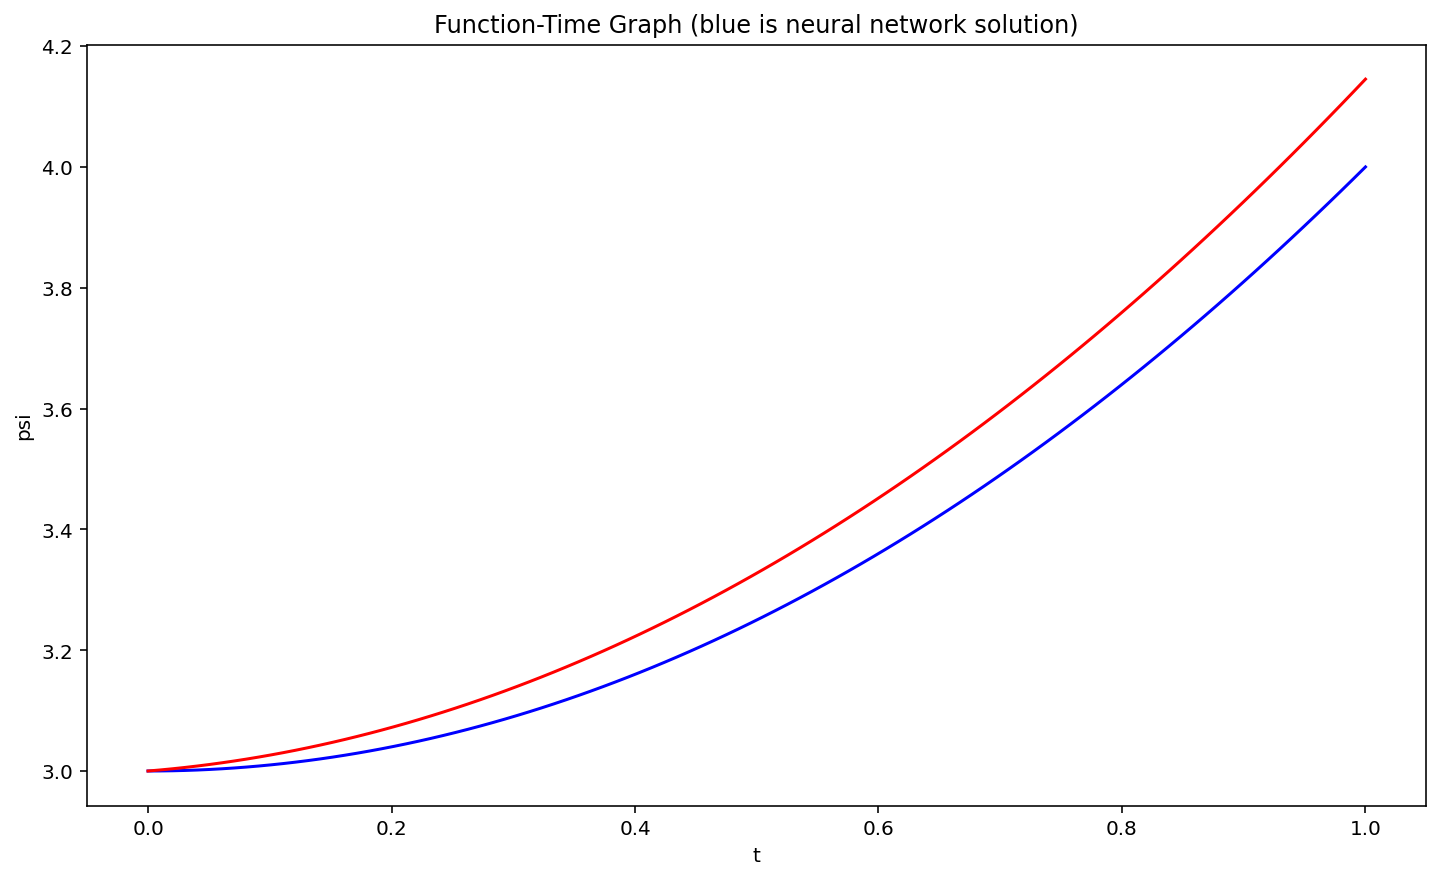

In [901]:
#plot to test results

t = np.linspace(0,1,100) #add points in the interval to test solution

psi = [] #holds function approximation
dpsi = [] #contains function derivative approximation

for t_i in t:
    neural_net_value = N(w0,w1,b0,b1,t_i).tolist()[0][0] #calculate point in neural network
    dneural_net_value = dN(w0,w1,b0,b1,t_i).tolist()[0][0] #calculate point in neural network derivative
    psi.append(func0+t_i*neural_net_value) #calculate and add the point in function approximation
    dpsi.append(dneural_net_value*t_i+neural_net_value) #calculate and add the point in function derivative approximation


plt.title("Function-Time Graph (blue is neural network solution)")
plt.xlabel("t")
plt.ylabel("psi")

plt.plot(t,func(t),'b')
plt.plot(t,psi,'r')

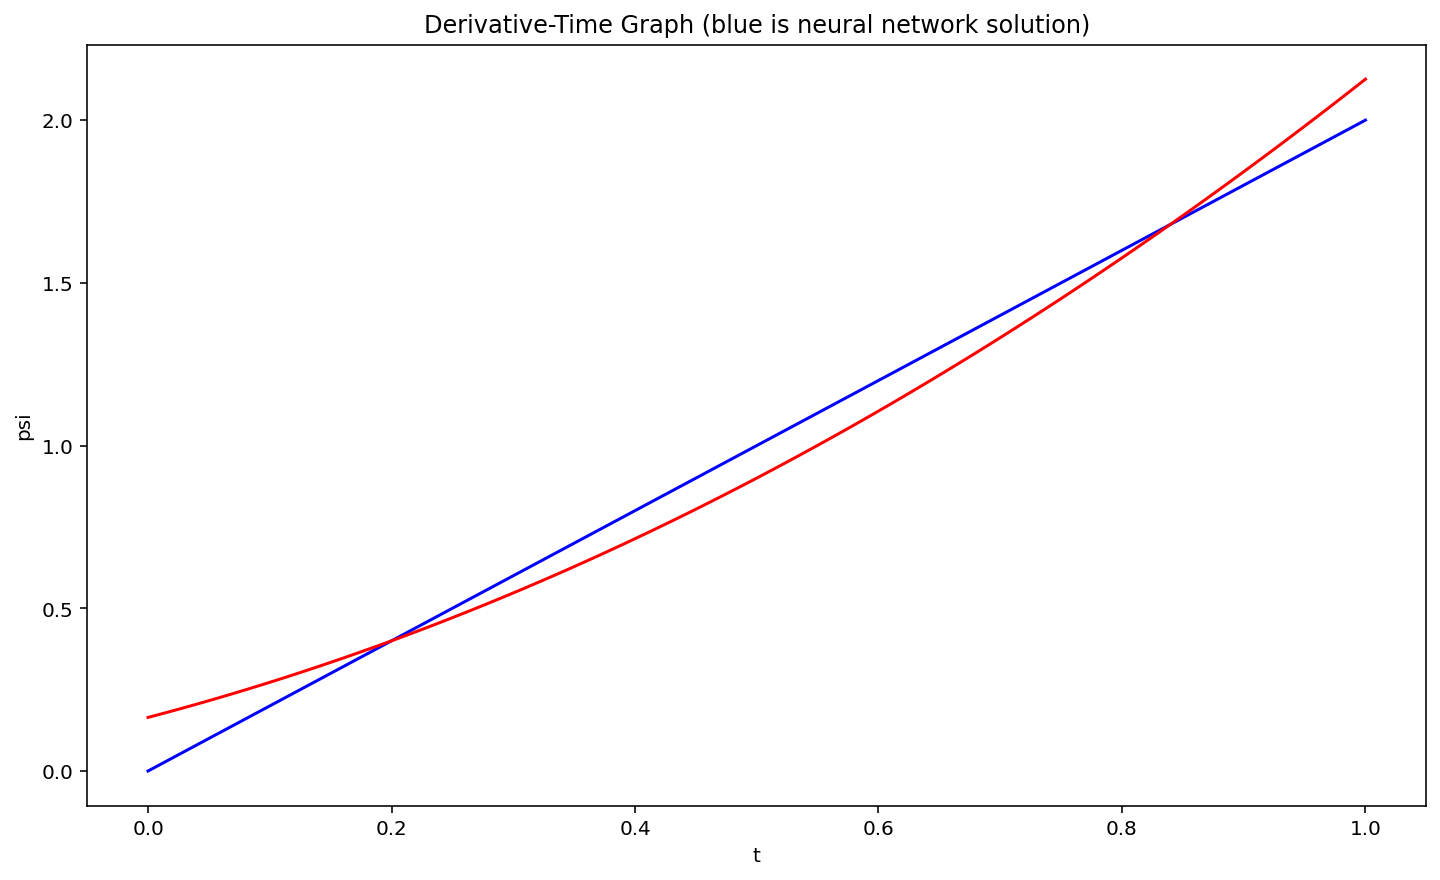

In [902]:
plt.title("Derivative-Time Graph (blue is neural network solution)")
plt.xlabel("t")
plt.ylabel("psi")

plt.plot(t,f(t),'b')
plt.plot(t,dpsi,'r')